<h1>Installing the Yahoo Finance API</h1>

In [ ]:
%pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

<h2>Understanding the Data</h2>

In [ ]:
ticker = 'RELIANCE.NS'
data = yf.download(ticker, start="2019-01-01", end="2023-12-31")
print(data.head())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  1028.852905  1030.727295  1015.000732  1024.966919  1000.963013   
2019-01-02  1019.023804  1030.453003  1006.680298  1011.617737   987.926453   
2019-01-03  1012.623474  1019.115234   996.714111   999.137085   975.738037   
2019-01-04  1003.388733  1009.834778   988.485107  1004.531616   981.006348   
2019-01-07  1012.166321  1022.635437  1006.680298  1010.109070   986.453064   

             Volume  
Date                 
2019-01-01  4873335  
2019-01-02  7814409  
2019-01-03  8144143  
2019-01-04  9258272  
2019-01-07  6030145  


<h2>Integrating All the NIFTY50 Stocks</h2>

[*****                 10%                       ]  5 of 50 completed

Successfully fetched 50 NIFTY 50 tickers

NIFTY 50 Tickers:
['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SHRIRAMFIN.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'TRENT.NS', 'ULTRACEMCO.NS', 'WIPRO.NS']


[*********************100%***********************]  50 of 50 completed


Successfully downloaded data for 50 stocks


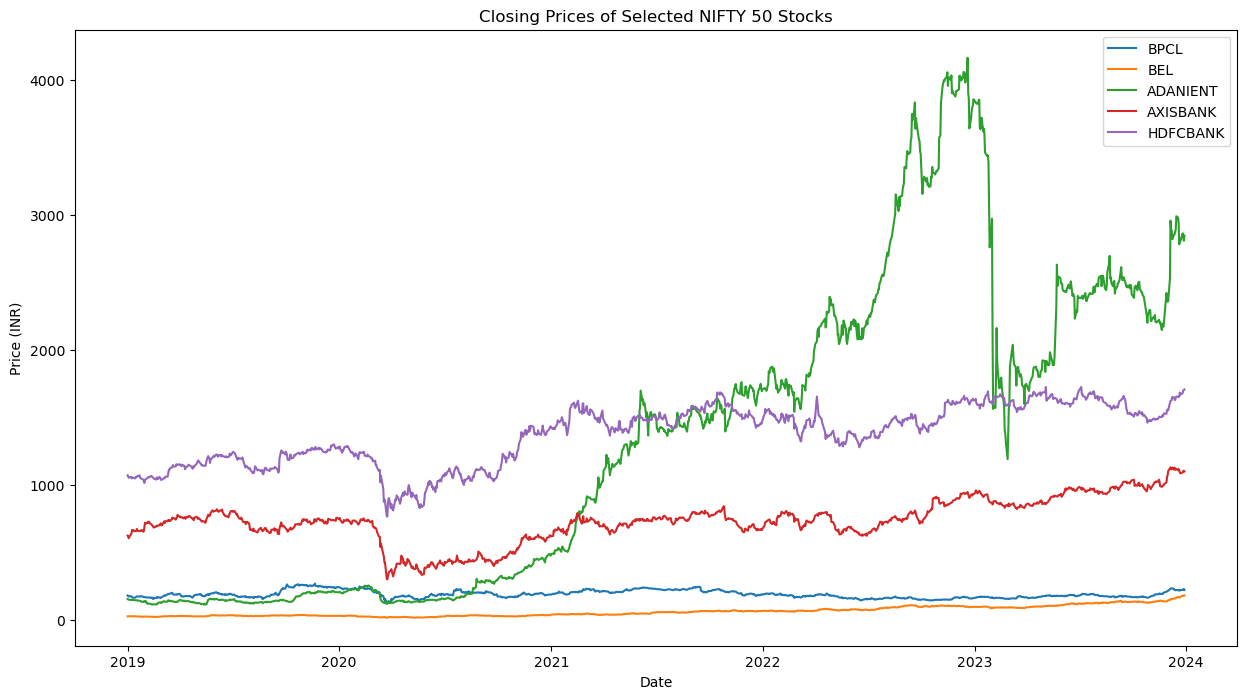


Summary Statistics:
               Mean Return  Volatility  Max Drawdown  Sharpe Ratio
APOLLOHOSP.NS     0.001469    0.022374     -0.395318      1.042134
MARUTI.NS         0.000456    0.019791     -0.480463      0.365557
INDUSINDBK.NS     0.000507    0.032123     -0.834551      0.250706
HINDUNILVR.NS     0.000426    0.014858     -0.308805      0.455399
SHRIRAMFIN.NS     0.000908    0.030610     -0.662976      0.470888
BAJFINANCE.NS     0.001131    0.024663     -0.625239      0.727777
TATASTEEL.NS      0.001112    0.024685     -0.544598      0.715093
NESTLEIND.NS      0.000818    0.014469     -0.228799      0.897402
BPCL.NS           0.000414    0.022267     -0.517352      0.295401
BAJAJFINSV.NS     0.001041    0.023089     -0.585896      0.715703
DRREDDY.NS        0.000779    0.016235     -0.333025      0.761391
HEROMOTOCO.NS     0.000420    0.019696     -0.503293      0.338832
JSWSTEEL.NS       0.001141    0.023526     -0.544439      0.769951
TCS.NS            0.000682    0.015640   

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class Nifty50Data:
    def __init__(self):
        self.nifty50_tickers = None
        self.stock_data = None

    def get_nifty50_tickers(self):
        """Fetch NIFTY 50 tickers from Wikipedia"""
        try:
            # Fetch NIFTY 50 components from Wikipedia
            url = "https://en.wikipedia.org/wiki/NIFTY_50"
            tables = pd.read_html(url)

            # The NIFTY 50 companies table is typically the second table
            nifty_table = tables[1]

            # Extract symbols and add .NS suffix for NSE
            self.nifty50_tickers = [f"{symbol}.NS" for symbol in nifty_table['Symbol'].tolist()]

            print(f"Successfully fetched {len(self.nifty50_tickers)} NIFTY 50 tickers")
            return self.nifty50_tickers

        except Exception as e:
            print(f"Error fetching NIFTY 50 tickers: {e}")
            return None

    def download_stock_data(self, start_date, end_date):
        """Download data for all NIFTY 50 stocks"""
        if self.nifty50_tickers is None:
            self.get_nifty50_tickers()

        try:
            print("Downloading stock data... This may take a few minutes.")
            self.stock_data = yf.download(
                self.nifty50_tickers,
                start=start_date,
                end=end_date,
                group_by='ticker'
            )

            print(f"Successfully downloaded data for {self.stock_data.shape[1] // 6} stocks")
            return self.stock_data

        except Exception as e:
            print(f"Error downloading stock data: {e}")
            return None

    def get_missing_tickers(self):
        """Identify any tickers that failed to download"""
        if self.stock_data is None:
            print("No stock data available. Please download data first.")
            return None

        available_tickers = set([col[0] for col in self.stock_data.columns])
        missing_tickers = set(self.nifty50_tickers) - available_tickers

        return list(missing_tickers)

    def plot_stock_prices(self, n_stocks=5):
        """Plot closing prices for n random stocks"""
        if self.stock_data is None:
            print("No stock data available. Please download data first.")
            return

        available_tickers = list(set([col[0] for col in self.stock_data.columns]))
        selected_tickers = np.random.choice(available_tickers, min(n_stocks, len(available_tickers)), replace=False)

        plt.figure(figsize=(15, 8))
        for ticker in selected_tickers:
            plt.plot(self.stock_data[ticker]['Close'], label=ticker.replace('.NS', ''))

        plt.title('Closing Prices of Selected NIFTY 50 Stocks')
        plt.xlabel('Date')
        plt.ylabel('Price (INR)')
        plt.legend()
        plt.show()

    def get_summary_statistics(self):
        """Generate summary statistics for all stocks"""
        if self.stock_data is None:
            print("No stock data available. Please download data first.")
            return None

        stats = {}
        for ticker in set([col[0] for col in self.stock_data.columns]):
            close_prices = self.stock_data[ticker]['Close']
            returns = close_prices.pct_change().dropna()

            stats[ticker] = {
                'Mean Return': returns.mean(),
                'Volatility': returns.std(),
                'Max Drawdown': (close_prices / close_prices.cummax() - 1).min(),
                'Sharpe Ratio': returns.mean() / returns.std() * np.sqrt(252) if returns.std() != 0 else 0
            }

        return pd.DataFrame(stats).T

# Example usage
def main():
    nifty_data = Nifty50Data()

    # Step 1: Get NIFTY 50 tickers
    tickers = nifty_data.get_nifty50_tickers()
    print("\nNIFTY 50 Tickers:")
    print(tickers)

    # Step 2: Download stock data
    start_date = "2019-01-01"
    end_date = "2023-12-31"
    data = nifty_data.download_stock_data(start_date, end_date)

    # Step 3: Check for missing tickers
    missing_tickers = nifty_data.get_missing_tickers()
    if missing_tickers:
        print("\nMissing Tickers:")
        print(missing_tickers)

    # Step 4: Plot some stock prices
    nifty_data.plot_stock_prices(n_stocks=5)

    # Step 5: Get summary statistics
    stats = nifty_data.get_summary_statistics()
    print("\nSummary Statistics:")
    print(stats)

    return nifty_data

# Run the main function
if __name__ == "__main__":
    nifty_data = main()

<h2>Analysing stocks based on their Sharpe Ratio</h2>

[*****                 10%                       ]  5 of 50 completed

Successfully fetched 50 NIFTY 50 tickers


[*********************100%***********************]  50 of 50 completed


Successfully downloaded data for 50 stocks
Reliance Industries Data:
Price                             Open         High          Low        Close  \
Date                                                                            
2019-01-01 00:00:00+00:00  1028.852905  1030.727295  1015.000732  1024.966919   
2019-01-02 00:00:00+00:00  1019.023804  1030.453003  1006.680298  1011.617737   
2019-01-03 00:00:00+00:00  1012.623474  1019.115234   996.714111   999.137085   
2019-01-04 00:00:00+00:00  1003.388733  1009.834778   988.485107  1004.531616   
2019-01-07 00:00:00+00:00  1012.166321  1022.635437  1006.680298  1010.109070   

Price                        Adj Close   Volume  
Date                                             
2019-01-01 00:00:00+00:00  1000.963013  4873335  
2019-01-02 00:00:00+00:00   987.926453  7814409  
2019-01-03 00:00:00+00:00   975.738037  8144143  
2019-01-04 00:00:00+00:00   981.006348  9258272  
2019-01-07 00:00:00+00:00   986.453064  6030145  


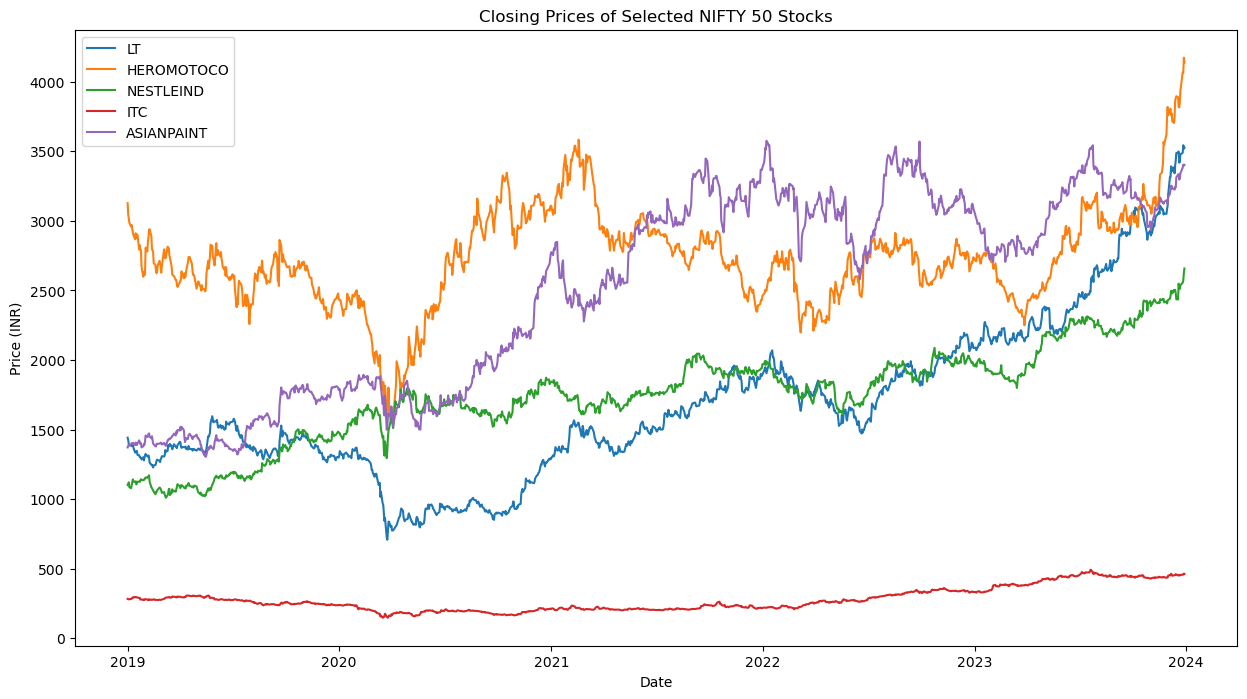


Top 5 stocks by Sharpe Ratio:
               Mean Return  Volatility  Max Drawdown  Sharpe Ratio
ADANIENT.NS       0.002952    0.034604     -0.713466      1.354069
TRENT.NS          0.002007    0.023546     -0.493184      1.352973
TATACONSUM.NS     0.001480    0.019110     -0.429327      1.229743
BEL.NS            0.001785    0.024044     -0.514535      1.178196
TITAN.NS          0.001294    0.018861     -0.417300      1.089099


In [ ]:
# Create an instance of Nifty50Data
nifty_data = Nifty50Data()

# Get tickers
tickers = nifty_data.get_nifty50_tickers()

# Download data
data = nifty_data.download_stock_data("2019-01-01", "2023-12-31")

# Now you can access the data in various ways:

# 1. Get data for a specific stock
reliance_data = data['RELIANCE.NS']
print("Reliance Industries Data:")
print(reliance_data.head())

# 2. Plot some stock prices
nifty_data.plot_stock_prices(n_stocks=5)

# 3. Get summary statistics
stats = nifty_data.get_summary_statistics()
print("\nTop 5 stocks by Sharpe Ratio:")
print(stats.sort_values('Sharpe Ratio', ascending=False).head())

<h3>Basic Momentum Calculation</h3>

In [ ]:
def calculate_momentum(self, lookback_period=20):
    """Calculate momentum for all stocks"""
    if self.stock_data is None:
        print("No stock data available. Please download data first.")
        return None

    momentum_data = {}
    for ticker in set([col[0] for col in self.stock_data.columns]):
        prices = self.stock_data[ticker]['Close']
        momentum = prices.pct_change(lookback_period)
        momentum_data[ticker] = momentum

    return pd.DataFrame(momentum_data)

# Add this method to the Nifty50Data class
Nifty50Data.calculate_momentum = calculate_momentum

# Usage example
momentum = nifty_data.calculate_momentum(lookback_period=20)
print("Top 5 stocks by momentum:")
print(momentum.iloc[-1].sort_values(ascending=False).head())

Top 5 stocks by momentum:
BEL.NS           0.262509
ADANIPORTS.NS    0.240884
ADANIENT.NS      0.207924
HINDALCO.NS      0.192378
NTPC.NS          0.190777
Name: 2023-12-29 00:00:00+00:00, dtype: float64


<h2>Calculating Momentum Scores using Technical Indicators</h2>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

class TechnicalIndicators:
    def __init__(self):
        self.stock_data = None
        self.indicators = {}

    def load_data(self, tickers, start_date, end_date):
        """Load stock data for the given tickers"""
        print("Downloading data...")
        self.stock_data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
        print("Data downloaded successfully")

    def calculate_rsi(self, ticker, period=14):
        """Calculate Relative Strength Index"""
        if self.stock_data is None:
            raise ValueError("Stock data not loaded. Call load_data first.")

        close_prices = self.stock_data[ticker]['Close']
        delta = close_prices.diff()

        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(window=period).mean()
        avg_loss = loss.rolling(window=period).mean()

        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))

        return rsi

    def calculate_moving_averages(self, ticker):
        """Calculate Simple Moving Averages"""
        if self.stock_data is None:
            raise ValueError("Stock data not loaded. Call load_data first.")

        close_prices = self.stock_data[ticker]['Close']
        sma_50 = close_prices.rolling(window=50).mean()
        sma_200 = close_prices.rolling(window=200).mean()

        return sma_50, sma_200

    def calculate_macd(self, ticker, fast_period=12, slow_period=26, signal_period=9):
        """Calculate MACD"""
        if self.stock_data is None:
            raise ValueError("Stock data not loaded. Call load_data first.")

        close_prices = self.stock_data[ticker]['Close']
        exp1 = close_prices.ewm(span=fast_period, adjust=False).mean()
        exp2 = close_prices.ewm(span=slow_period, adjust=False).mean()

        macd_line = exp1 - exp2
        signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
        macd_histogram = macd_line - signal_line

        return macd_line, signal_line, macd_histogram

    def calculate_all_indicators(self, ticker):
        """Calculate all technical indicators for a given ticker"""
        rsi = self.calculate_rsi(ticker)
        sma_50, sma_200 = self.calculate_moving_averages(ticker)
        macd_line, signal_line, macd_histogram = self.calculate_macd(ticker)

        return {
            'RSI': rsi,
            'SMA_50': sma_50,
            'SMA_200': sma_200,
            'MACD_Line': macd_line,
            'MACD_Signal': signal_line,
            'MACD_Histogram': macd_histogram
        }

    def calculate_momentum_score(self, ticker):
        """Calculate a composite momentum score"""
        indicators = self.calculate_all_indicators(ticker)
        close_prices = self.stock_data[ticker]['Close']

        # 1. RSI Component (0-100 score)
        rsi_score = indicators['RSI']

        # 2. Moving Average Component (-100 to 100 score)
        ma_score = pd.Series(0, index=close_prices.index)
        ma_score[close_prices > indicators['SMA_50']] += 50
        ma_score[close_prices > indicators['SMA_200']] += 50
        ma_score[indicators['SMA_50'] > indicators['SMA_200']] += 50
        ma_score = ma_score - 75  # Center around 0

        # 3. MACD Component (-100 to 100 score)
        macd_score = pd.Series(0, index=close_prices.index)
        macd_score[indicators['MACD_Line'] > indicators['MACD_Signal']] = 100
        macd_score[indicators['MACD_Line'] < indicators['MACD_Signal']] = -100

        # Combine scores with weights
        momentum_score = (
            0.35 * (rsi_score - 50) +  # Center RSI around 0
            0.4 * ma_score +
            0.25 * macd_score
        )

        return momentum_score

    def get_momentum_signals(self, threshold=25):
        """Get trading signals based on momentum scores"""
        if self.stock_data is None:
            raise ValueError("Stock data not loaded. Call load_data first.")

        all_scores = {}
        for ticker in set([col[0] for col in self.stock_data.columns]):
            try:
                all_scores[ticker] = self.calculate_momentum_score(ticker)
            except Exception as e:
                print(f"Error calculating momentum for {ticker}: {e}")

        # Convert to DataFrame for easier manipulation
        scores_df = pd.DataFrame(all_scores)

        # Generate signals
        signals = pd.DataFrame(index=scores_df.index)
        for date in scores_df.index:
            daily_scores = scores_df.loc[date].dropna()

            if len(daily_scores) > 0:
                # Rank stocks by momentum score
                ranked_stocks = daily_scores.sort_values()

                # Select top and bottom stocks
                n_stocks = max(1, len(ranked_stocks) // 10)  # Top/bottom 10%

                signals.loc[date, ranked_stocks.index[-n_stocks:]] = 1  # Long signals
                signals.loc[date, ranked_stocks.index[:n_stocks]] = -1  # Short signals

        return signals.fillna(0)

# Example usage
def main():
    # Initialize
    ti = TechnicalIndicators()

    # Define NIFTY 50 tickers (you should replace this with actual NIFTY 50 tickers)
    # nifty_tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']
    nifty_tickers = nifty_data.get_nifty50_tickers()

    # Load data
    ti.load_data(nifty_tickers, start_date="2022-01-01", end_date="2023-12-31")

    # Example for one stock
    ticker = nifty_tickers[0]

    # Calculate indicators
    indicators = ti.calculate_all_indicators(ticker)

    # Calculate momentum score
    momentum_score = ti.calculate_momentum_score(ticker)

    # Get trading signals for all stocks
    signals = ti.get_momentum_signals()

    # Print results
    print(f"\nMomentum Score for {ticker}:")
    print(momentum_score.tail())

    print("\nTrading Signals (last 5 days):")
    print(signals.tail())

    return ti, signals

# Run the main function
if __name__ == "__main__":
    ti, signals = main()

Successfully fetched 50 NIFTY 50 tickers


[*********************100%***********************]  50 of 50 completed


Data downloaded successfully

Momentum Score for ADANIENT.NS:
Date
2023-12-22 00:00:00+00:00    9.980362
2023-12-26 00:00:00+00:00    2.273967
2023-12-27 00:00:00+00:00    3.707010
2023-12-28 00:00:00+00:00    2.668176
2023-12-29 00:00:00+00:00    5.846878
dtype: float64

Trading Signals (last 5 days):
                           TRENT.NS  NTPC.NS  ONGC.NS  SBIN.NS  HEROMOTOCO.NS  \
Date                                                                            
2023-12-22 00:00:00+00:00       0.0      0.0      0.0      0.0            0.0   
2023-12-26 00:00:00+00:00       0.0      0.0      0.0      0.0            0.0   
2023-12-27 00:00:00+00:00       0.0      0.0      0.0      0.0            0.0   
2023-12-28 00:00:00+00:00       0.0      0.0      0.0      0.0            1.0   
2023-12-29 00:00:00+00:00       0.0      0.0      0.0      0.0            1.0   

                           WIPRO.NS  DRREDDY.NS  CIPLA.NS  HCLTECH.NS  \
Date                                                   

<h2>Identifying & Analyzing Short and Long Position Stocks Based on their Momentum scores</h2>

[**********            20%                       ]  10 of 50 completed

Successfully fetched 50 NIFTY 50 tickers


[*********************100%***********************]  50 of 50 completed


Data downloaded successfully


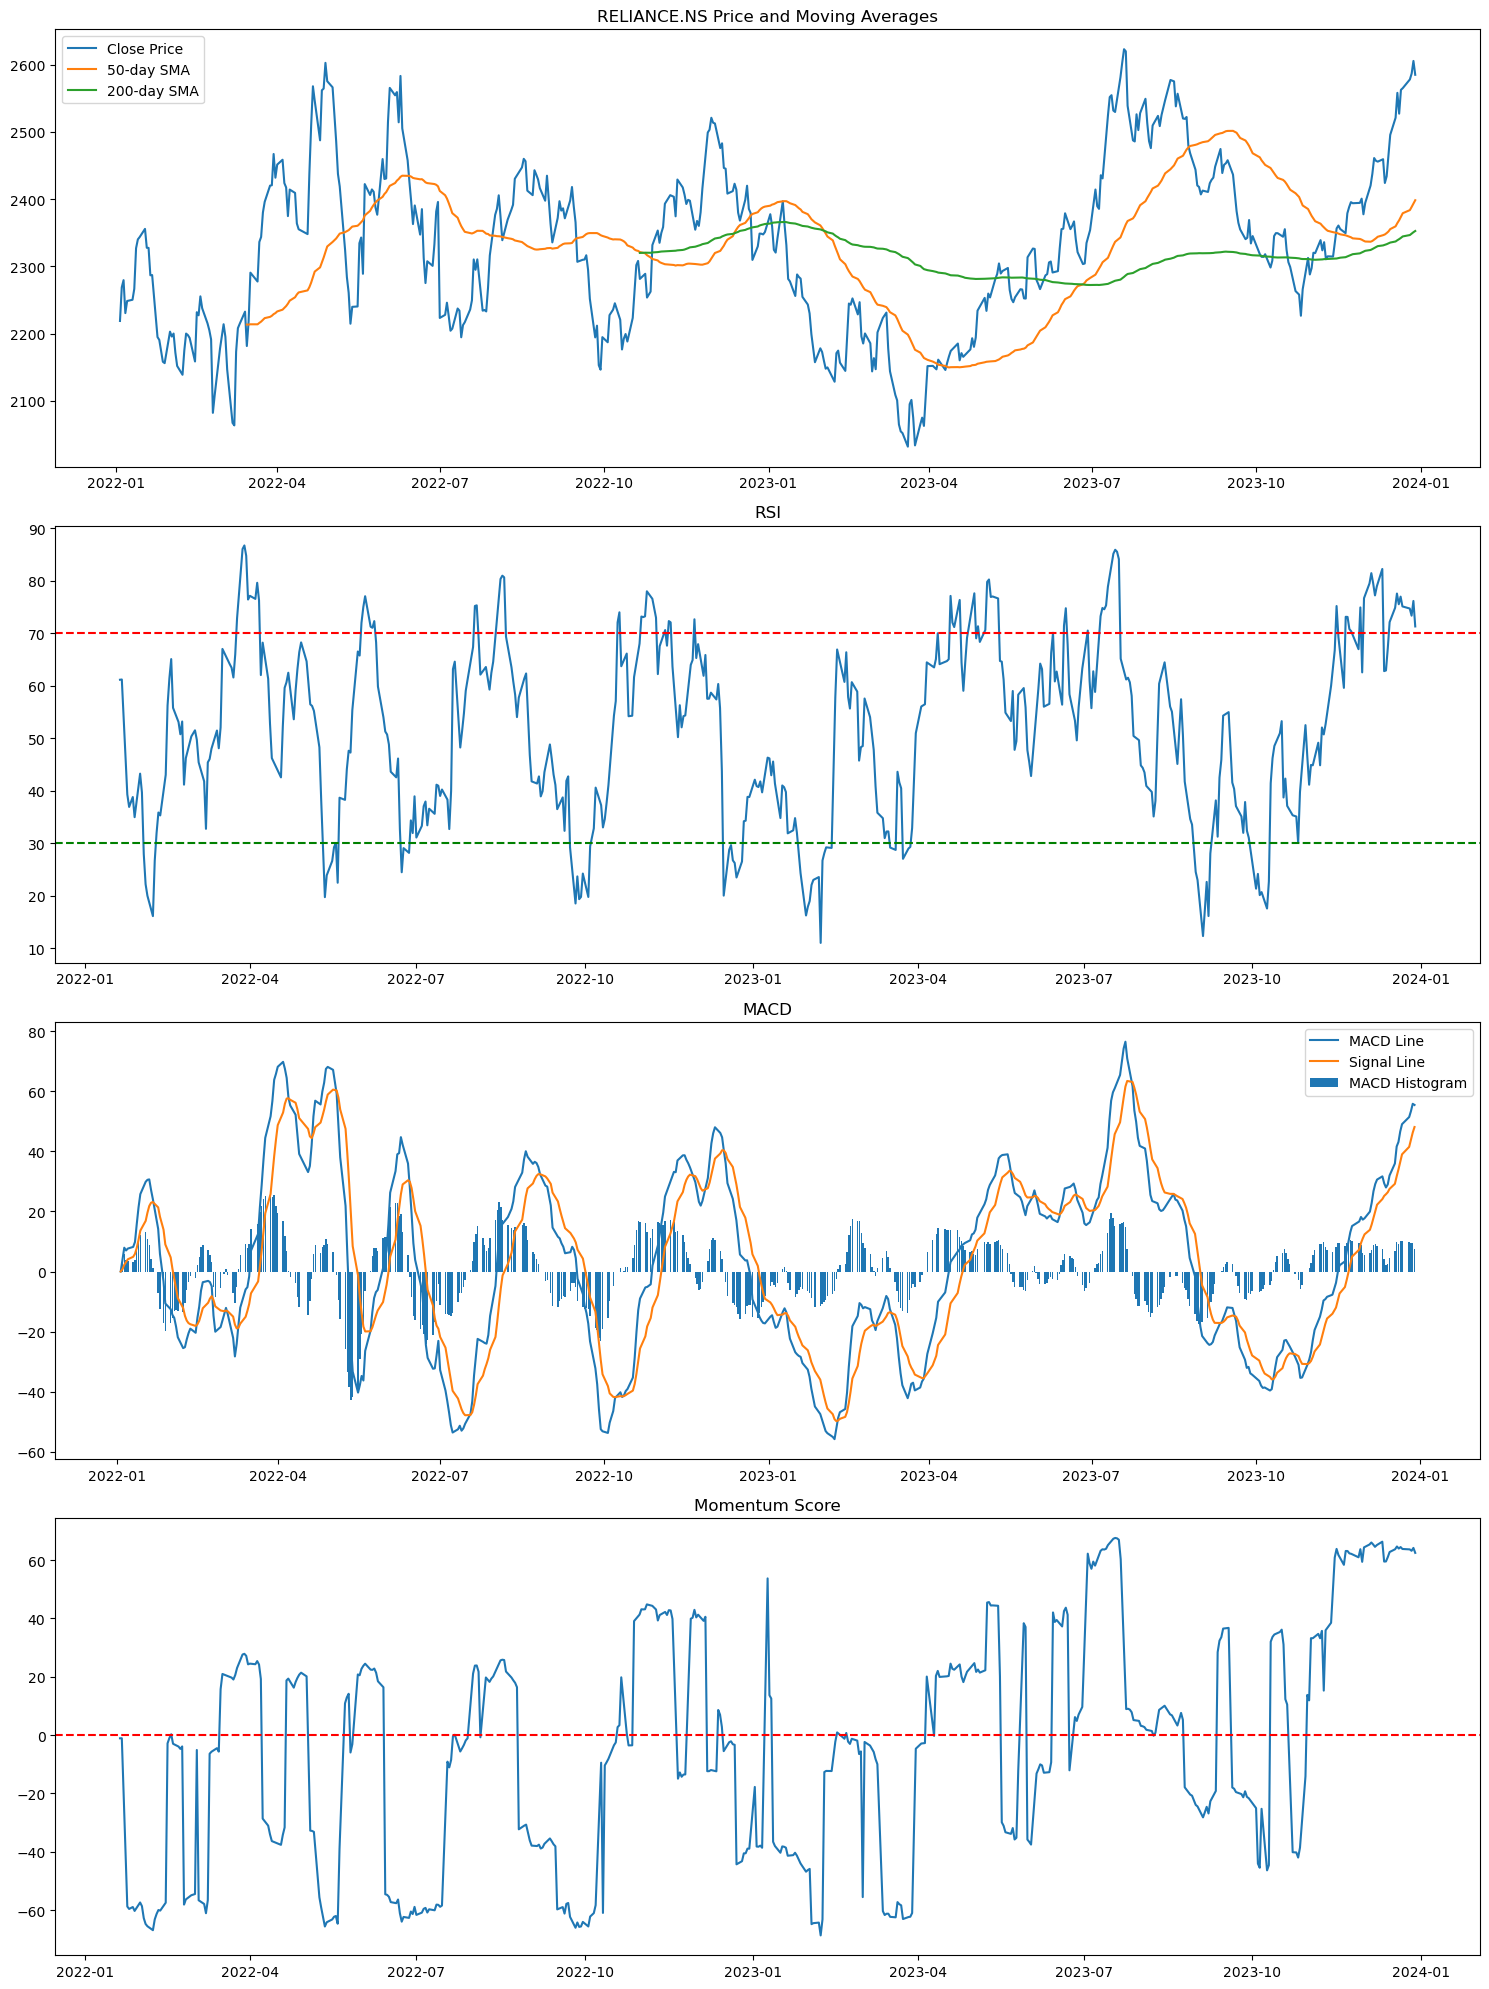


Current Long Positions:
['HEROMOTOCO.NS', 'HINDALCO.NS', 'BEL.NS', 'ULTRACEMCO.NS', 'TATACONSUM.NS']

Current Short Positions:
['MARUTI.NS', 'AXISBANK.NS', 'HDFCLIFE.NS', 'BPCL.NS', 'BAJFINANCE.NS']


In [ ]:
# Initialize
ti = TechnicalIndicators()

# Define your NIFTY 50 tickers
# nifty_tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS']  # Add all 50
nifty_tickers = nifty_data.get_nifty50_tickers()

# Load data
ti.load_data(nifty_tickers, start_date="2022-01-01", end_date="2023-12-31")

# For a single stock analysis
ticker = 'RELIANCE.NS'
indicators = ti.calculate_all_indicators(ticker)
momentum_score = ti.calculate_momentum_score(ticker)

# Plot the indicators and momentum score
import matplotlib.pyplot as plt

def plot_indicators(ti, ticker):
    indicators = ti.calculate_all_indicators(ticker)
    momentum_score = ti.calculate_momentum_score(ticker)

    fig, axes = plt.subplots(4, 1, figsize=(15, 20))

    # Plot 1: Price and Moving Averages
    ax1 = axes[0]
    ax1.plot(ti.stock_data[ticker]['Close'], label='Close Price')
    ax1.plot(indicators['SMA_50'], label='50-day SMA')
    ax1.plot(indicators['SMA_200'], label='200-day SMA')
    ax1.set_title(f'{ticker} Price and Moving Averages')
    ax1.legend()

    # Plot 2: RSI
    ax2 = axes[1]
    ax2.plot(indicators['RSI'])
    ax2.axhline(y=70, color='r', linestyle='--')
    ax2.axhline(y=30, color='g', linestyle='--')
    ax2.set_title('RSI')

    # Plot 3: MACD
    ax3 = axes[2]
    ax3.plot(indicators['MACD_Line'], label='MACD Line')
    ax3.plot(indicators['MACD_Signal'], label='Signal Line')
    ax3.bar(indicators['MACD_Histogram'].index, indicators['MACD_Histogram'], label='MACD Histogram')
    ax3.set_title('MACD')
    ax3.legend()

    # Plot 4: Momentum Score
    ax4 = axes[3]
    ax4.plot(momentum_score)
    ax4.axhline(y=0, color='r', linestyle='--')
    ax4.set_title('Momentum Score')

    plt.tight_layout()
    plt.show()

# Plot indicators for a stock
plot_indicators(ti, ticker)

# Get trading signals
signals = ti.get_momentum_signals()

# Print current positions
current_signals = signals.iloc[-1]
print("\nCurrent Long Positions:")
print(current_signals[current_signals == 1].index.tolist())
print("\nCurrent Short Positions:")
print(current_signals[current_signals == -1].index.tolist())


<h2>Risk Management along with a demonstration</h2>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

class RiskManager:
    def __init__(self, initial_capital=1000000, max_position_size=0.1,
                 max_drawdown=0.15, stop_loss_pct=0.05):
        self.initial_capital = initial_capital
        self.current_capital = initial_capital
        self.max_position_size = max_position_size
        self.max_drawdown = max_drawdown
        self.stop_loss_pct = stop_loss_pct
        self.peak_capital = initial_capital
        self.positions = {}

    def calculate_position_size(self, stock_price):
        max_capital_per_position = self.current_capital * self.max_position_size
        return int(max_capital_per_position / stock_price)

    def check_drawdown(self):
        current_drawdown = (self.peak_capital - self.current_capital) / self.peak_capital
        return current_drawdown > self.max_drawdown

    def update_capital(self, pnl):
        self.current_capital += pnl
        if self.current_capital > self.peak_capital:
            self.peak_capital = self.current_capital

    def add_position(self, stock, price, shares, position_type='long'):
        stop_loss = price * (1 - self.stop_loss_pct) if position_type == 'long' else \
                    price * (1 + self.stop_loss_pct)
        self.positions[stock] = {
            'entry_price': price,
            'shares': shares,
            'stop_loss': stop_loss,
            'type': position_type
        }

    def check_stop_loss(self, stock, current_price):
        if stock in self.positions:
            position = self.positions[stock]
            if position['type'] == 'long':
                return current_price <= position['stop_loss']
            else:  # short position
                return current_price >= position['stop_loss']
        return False

    def get_portfolio_metrics(self):
        return {
            'current_capital': round(self.current_capital, 2),
            'peak_capital': round(self.peak_capital, 2),
            'current_drawdown': round((self.peak_capital - self.current_capital) / self.peak_capital * 100, 2),
            'num_positions': len(self.positions),
            'positions': self.positions
        }

    def execute_trade(self, stock, price, shares, trade_type='buy'):
        if trade_type not in ['buy', 'sell', 'short', 'cover']:
            raise ValueError("Invalid trade type")

        if trade_type in ['buy', 'short']:
            position_value = price * shares
            if position_value > self.current_capital * self.max_position_size:
                shares = self.calculate_position_size(price)
                if shares == 0:
                    return None, "Position size too small"

        if trade_type == 'buy':
            cost = price * shares
            if cost <= self.current_capital:
                self.add_position(stock, price, shares, 'long')
                self.update_capital(-cost)
                return shares, f"Long position opened: {shares} shares at {price}"
        elif trade_type == 'short':
            cost = price * shares
            if cost <= self.current_capital:
                self.add_position(stock, price, shares, 'short')
                return shares, f"Short position opened: {shares} shares at {price}"
        elif trade_type in ['sell', 'cover']:
            if stock in self.positions:
                position = self.positions[stock]
                pnl = (price - position['entry_price']) * position['shares'] if trade_type == 'sell' else \
                      (position['entry_price'] - price) * position['shares']
                self.update_capital(pnl)
                del self.positions[stock]
                return position['shares'], f"Position closed, PnL: {round(pnl, 2)}"

        return None, "Trade could not be executed"

def print_portfolio_status(risk_manager, action=""):
    print(f"\n=== Portfolio Status after {action} ===")
    metrics = risk_manager.get_portfolio_metrics()
    print(f"Current Capital: ₹{metrics['current_capital']:,.2f}")
    print(f"Peak Capital: ₹{metrics['peak_capital']:,.2f}")
    print(f"Current Drawdown: {metrics['current_drawdown']}%")
    print(f"Number of Positions: {metrics['num_positions']}")

    if metrics['positions']:
        print("\nCurrent Positions:")
        for stock, details in metrics['positions'].items():
            print(f"{stock}: {details['shares']} shares @ ₹{details['entry_price']} ({details['type']})")
    print("=" * 40)

# Main demonstration
def run_risk_management_demo():
    print("Starting Risk Management Demonstration")
    print("Initial capital: ₹10,00,000")

    # Initialize risk manager
    risk_manager = RiskManager(initial_capital=1000000)
    print_portfolio_status(risk_manager, "initialization")

    # Simulate multiple trades
    trades = [
        ("RELIANCE", 2500, 40, "buy"),
        ("HDFCBANK", 1500, 60, "short"),
        ("TCS", 3500, 25, "buy"),
    ]

    # Execute trades
    for stock, price, shares, trade_type in trades:
        executed_shares, message = risk_manager.execute_trade(stock, price, shares, trade_type)
        print(f"\nExecuting {trade_type} trade for {stock}:")
        print(f"Result: {message}")
        print_portfolio_status(risk_manager, f"{trade_type} {stock}")

    # Simulate price changes and check stop losses
    price_changes = [
        ("RELIANCE", 2375),  # 5% drop, should trigger stop loss
        ("HDFCBANK", 1575),  # 5% rise, should trigger stop loss for short
    ]

    for stock, new_price in price_changes:
        print(f"\nChecking stop loss for {stock} at price ₹{new_price}")
        if risk_manager.check_stop_loss(stock, new_price):
            trade_type = "sell" if risk_manager.positions[stock]['type'] == 'long' else "cover"
            shares, message = risk_manager.execute_trade(stock, new_price,
                risk_manager.positions[stock]['shares'], trade_type)
            print(f"Stop loss triggered: {message}")
            print_portfolio_status(risk_manager, f"stop loss for {stock}")

    # Final portfolio status
    print("\nFinal Portfolio Status:")
    print_portfolio_status(risk_manager, "all trades")

# Run the demonstration
if __name__ == "__main__":
    run_risk_management_demo()

Starting Risk Management Demonstration
Initial capital: ₹10,00,000

=== Portfolio Status after initialization ===
Current Capital: ₹1,000,000.00
Peak Capital: ₹1,000,000.00
Current Drawdown: 0.0%
Number of Positions: 0

Executing buy trade for RELIANCE:
Result: Long position opened: 40 shares at 2500

=== Portfolio Status after buy RELIANCE ===
Current Capital: ₹900,000.00
Peak Capital: ₹1,000,000.00
Current Drawdown: 10.0%
Number of Positions: 1

Current Positions:
RELIANCE: 40 shares @ ₹2500 (long)

Executing short trade for HDFCBANK:
Result: Short position opened: 60 shares at 1500

=== Portfolio Status after short HDFCBANK ===
Current Capital: ₹900,000.00
Peak Capital: ₹1,000,000.00
Current Drawdown: 10.0%
Number of Positions: 2

Current Positions:
RELIANCE: 40 shares @ ₹2500 (long)
HDFCBANK: 60 shares @ ₹1500 (short)

Executing buy trade for TCS:
Result: Long position opened: 25 shares at 3500

=== Portfolio Status after buy TCS ===
Current Capital: ₹812,500.00
Peak Capital: ₹1,00

<h2>Visualizing our Strategy using the previous demonstration</h2>

[*********************100%***********************]  1 of 1 completed
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Performance Metrics:
Sharpe Ratio: 1.1010
Sortino Ratio: 1.9354
Maximum Drawdown: -0.1818
Annualized Return: 0.2227
Annualized Volatility: 0.1568


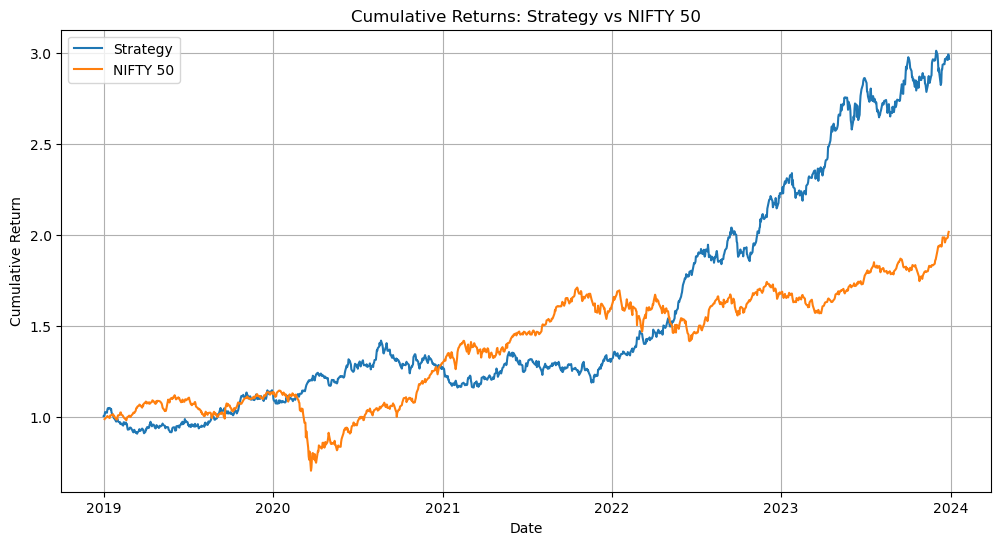

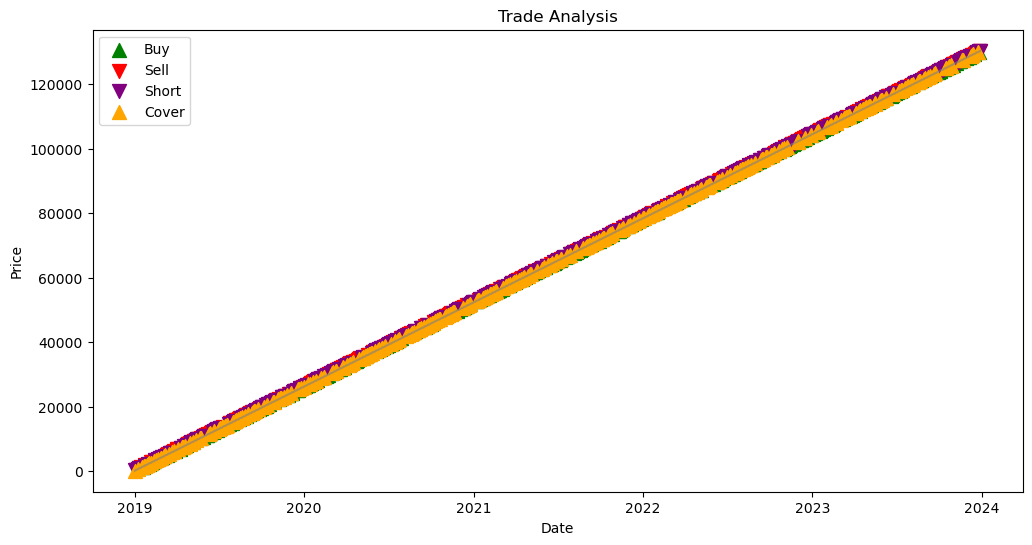

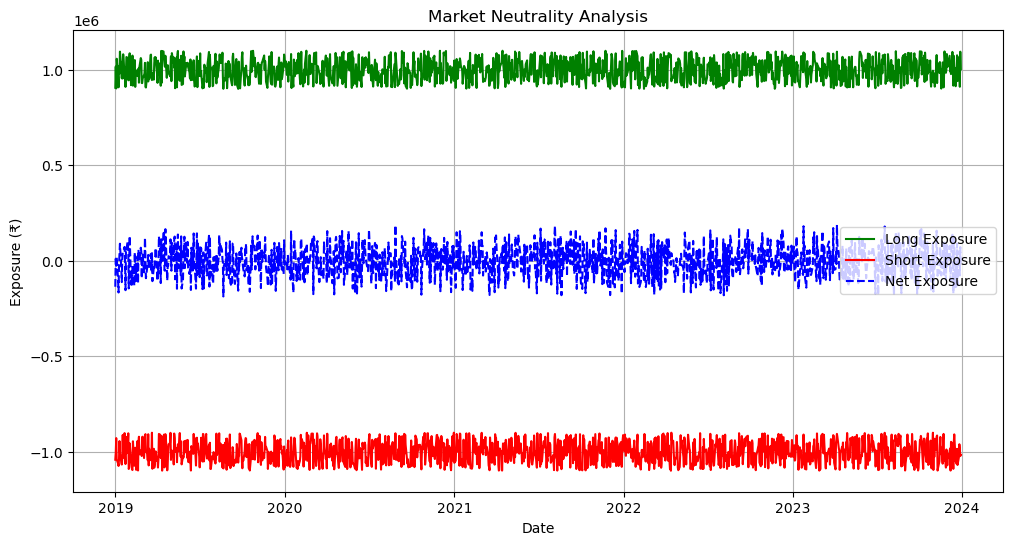

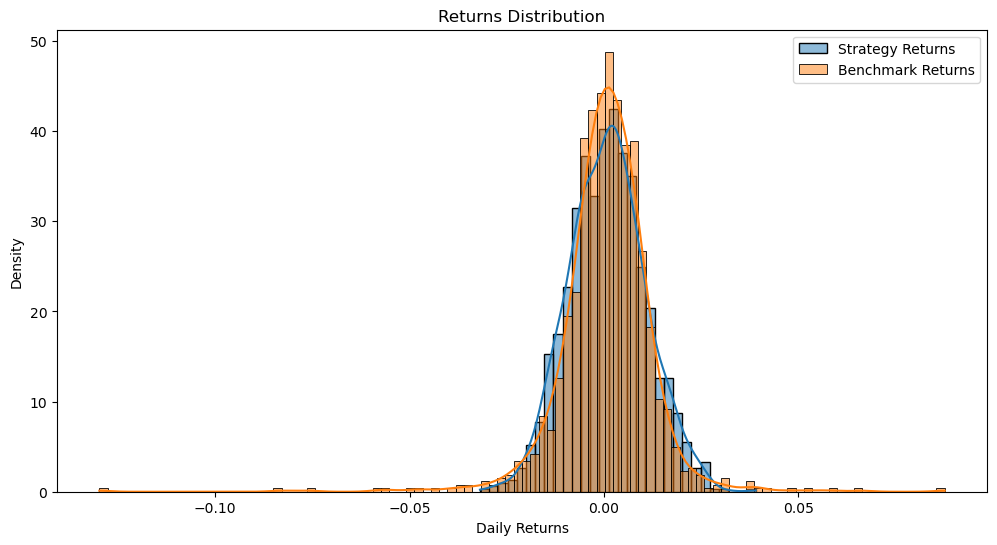

In [ ]:
# this code is based on the trades we assumed in the previous code and calculations are also done accordingly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yfinance as yf

class StrategyVisualizer:
    def __init__(self, strategy_returns, benchmark_symbol='^NSEI'):
        self.strategy_returns = strategy_returns
        self.benchmark_symbol = benchmark_symbol
        self.benchmark_returns = self._get_benchmark_returns()
        self.risk_free_rate = 0.05  # Assuming 5% risk-free rate, adjust as needed

    def _get_benchmark_returns(self):
        benchmark = yf.download(self.benchmark_symbol,
                               start=self.strategy_returns.index[0],
                               end=self.strategy_returns.index[-1])
        return benchmark['Close'].pct_change().dropna()

    def plot_cumulative_returns(self):
        plt.figure(figsize=(12, 6))
        cum_strategy = (1 + self.strategy_returns).cumprod()
        cum_benchmark = (1 + self.benchmark_returns).cumprod()

        plt.plot(cum_strategy.index, cum_strategy, label='Strategy')
        plt.plot(cum_benchmark.index, cum_benchmark, label='NIFTY 50')

        plt.title('Cumulative Returns: Strategy vs NIFTY 50')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        plt.legend()
        plt.grid(True)
        return plt

    def calculate_performance_metrics(self):
        # Annualization factor (252 trading days)
        annualize_factor = np.sqrt(252)

        # Sharpe Ratio
        excess_returns = self.strategy_returns - self.risk_free_rate/252
        sharpe_ratio = (np.mean(excess_returns) / np.std(self.strategy_returns)) * annualize_factor

        # Sortino Ratio
        downside_returns = self.strategy_returns[self.strategy_returns < 0]
        sortino_ratio = (np.mean(excess_returns) / np.std(downside_returns)) * annualize_factor

        # Maximum Drawdown
        cum_returns = (1 + self.strategy_returns).cumprod()
        rolling_max = cum_returns.expanding().max()
        drawdowns = cum_returns/rolling_max - 1
        max_drawdown = drawdowns.min()

        return {
            'Sharpe Ratio': sharpe_ratio,
            'Sortino Ratio': sortino_ratio,
            'Maximum Drawdown': max_drawdown,
            'Annualized Return': np.mean(self.strategy_returns) * 252,
            'Annualized Volatility': np.std(self.strategy_returns) * annualize_factor
        }

    def plot_trade_analysis(self, trade_data):
        """
        trade_data should be a DataFrame with columns:
        'Date', 'Price', 'Type' (buy/sell/short/cover)
        """
        plt.figure(figsize=(12, 6))

        # Plot price movement
        plt.plot(trade_data.index, trade_data['Price'], color='gray', alpha=0.6)

        # Plot entry/exit points
        buys = trade_data[trade_data['Type'] == 'buy']
        sells = trade_data[trade_data['Type'] == 'sell']
        shorts = trade_data[trade_data['Type'] == 'short']
        covers = trade_data[trade_data['Type'] == 'cover']

        plt.scatter(buys.index, buys['Price'], color='green', marker='^', label='Buy', s=100)
        plt.scatter(sells.index, sells['Price'], color='red', marker='v', label='Sell', s=100)
        plt.scatter(shorts.index, shorts['Price'], color='purple', marker='v', label='Short', s=100)
        plt.scatter(covers.index, covers['Price'], color='orange', marker='^', label='Cover', s=100)

        plt.title('Trade Analysis')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        return plt

    def plot_market_neutrality(self, long_exposure, short_exposure):
        """
        long_exposure and short_exposure should be pandas Series with DateTimeIndex
        """
        plt.figure(figsize=(12, 6))

        plt.plot(long_exposure.index, long_exposure, label='Long Exposure', color='green')
        plt.plot(short_exposure.index, short_exposure, label='Short Exposure', color='red')
        plt.plot(long_exposure.index, long_exposure + short_exposure,
                 label='Net Exposure', color='blue', linestyle='--')

        plt.title('Market Neutrality Analysis')
        plt.xlabel('Date')
        plt.ylabel('Exposure (₹)')
        plt.legend()
        plt.grid(True)
        return plt

    def plot_returns_distribution(self):
        plt.figure(figsize=(12, 6))

        sns.histplot(self.strategy_returns, kde=True, stat='density', label='Strategy Returns')
        sns.histplot(self.benchmark_returns, kde=True, stat='density', label='Benchmark Returns')

        plt.title('Returns Distribution')
        plt.xlabel('Daily Returns')
        plt.ylabel('Density')
        plt.legend()
        return plt

# Example usage function
def demonstrate_visualizations():
    # Generate sample data
    np.random.seed(42)
    dates = pd.date_range(start='2019-01-01', end='2023-12-31', freq='B')

    # Sample strategy returns (slightly better than benchmark)
    strategy_returns = pd.Series(np.random.normal(0.0005, 0.01, len(dates)), index=dates)

    # Sample trade data
    trade_data = pd.DataFrame({
        'Price': 100 * (1 + np.random.normal(0, 0.01, len(dates))).cumsum(),
        'Type': np.random.choice(['buy', 'sell', 'short', 'cover'], len(dates))
    }, index=dates)

    # Sample exposure data
    long_exposure = pd.Series(np.random.uniform(900000, 1100000, len(dates)), index=dates)
    short_exposure = pd.Series(np.random.uniform(-1100000, -900000, len(dates)), index=dates)

    # Initialize visualizer
    visualizer = StrategyVisualizer(strategy_returns)

    # Generate all plots
    cumulative_returns_plot = visualizer.plot_cumulative_returns()
    cumulative_returns_plot.savefig('cumulative_returns.png')

    trade_analysis_plot = visualizer.plot_trade_analysis(trade_data)
    trade_analysis_plot.savefig('trade_analysis.png')

    market_neutrality_plot = visualizer.plot_market_neutrality(long_exposure, short_exposure)
    market_neutrality_plot.savefig('market_neutrality.png')

    returns_dist_plot = visualizer.plot_returns_distribution()
    returns_dist_plot.savefig('returns_distribution.png')

    # Calculate and print performance metrics
    metrics = visualizer.calculate_performance_metrics()
    print("\nPerformance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    return visualizer

# Function to create a comprehensive report
def create_strategy_report(strategy_returns, trade_data, long_exposure, short_exposure):
    visualizer = StrategyVisualizer(strategy_returns)

    # Create all visualizations
    visualizer.plot_cumulative_returns().savefig('cumulative_returns.png')
    visualizer.plot_trade_analysis(trade_data).savefig('trade_analysis.png')
    visualizer.plot_market_neutrality(long_exposure, short_exposure).savefig('market_neutrality.png')
    visualizer.plot_returns_distribution().savefig('returns_distribution.png')

    # Calculate metrics
    metrics = visualizer.calculate_performance_metrics()

    # Create HTML report
    html_report = f"""
    <html>
    <head>
        <title>Trading Strategy Analysis Report</title>
        <style>
            body {{ font-family: Arial, sans-serif; margin: 20px; }}
            .metric {{ margin-bottom: 10px; }}
            .plot {{ margin-bottom: 20px; }}
        </style>
    </head>
    <body>
        <h1>Trading Strategy Analysis Report</h1>

        <h2>Performance Metrics</h2>
        {''.join(f'<div class="metric"><b>{k}:</b> {v:.4f}</div>' for k, v in metrics.items())}

        <h2>Visualizations</h2>
        <div class="plot">
            <h3>Cumulative Returns</h3>
            <img src="cumulative_returns.png" alt="Cumulative Returns">
        </div>

        <div class="plot">
            <h3>Trade Analysis</h3>
            <img src="trade_analysis.png" alt="Trade Analysis">
        </div>

        <div class="plot">
            <h3>Market Neutrality</h3>
            <img src="market_neutrality.png" alt="Market Neutrality">
        </div>

        <div class="plot">
            <h3>Returns Distribution</h3>
            <img src="returns_distribution.png" alt="Returns Distribution">
        </div>
    </body>
    </html>
    """

    with open('strategy_report.html', 'w') as f:
        f.write(html_report)

    return metrics

if __name__ == "__main__":
    demonstrate_visualizations()

<h2>Enhanced Trade Analyzer</h2>

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Overall Metrics:
Total Trades: 1000.00
Winning Trades: 538.00
Losing Trades: 462.00
Total Profit: 469211.26
Total Loss: -355056.63
Largest Win: 3646.64
Largest Loss: -2794.47
Average Trade Duration: 0.07
Win Rate: 53.80

Metrics by Trade Type:
buy:
  Count: 507.00
  Avg PnL: 116.10
  Avg Duration: 0.07
sell:
  Count: 493.00
  Avg PnL: 112.15
  Avg Duration: 0.07


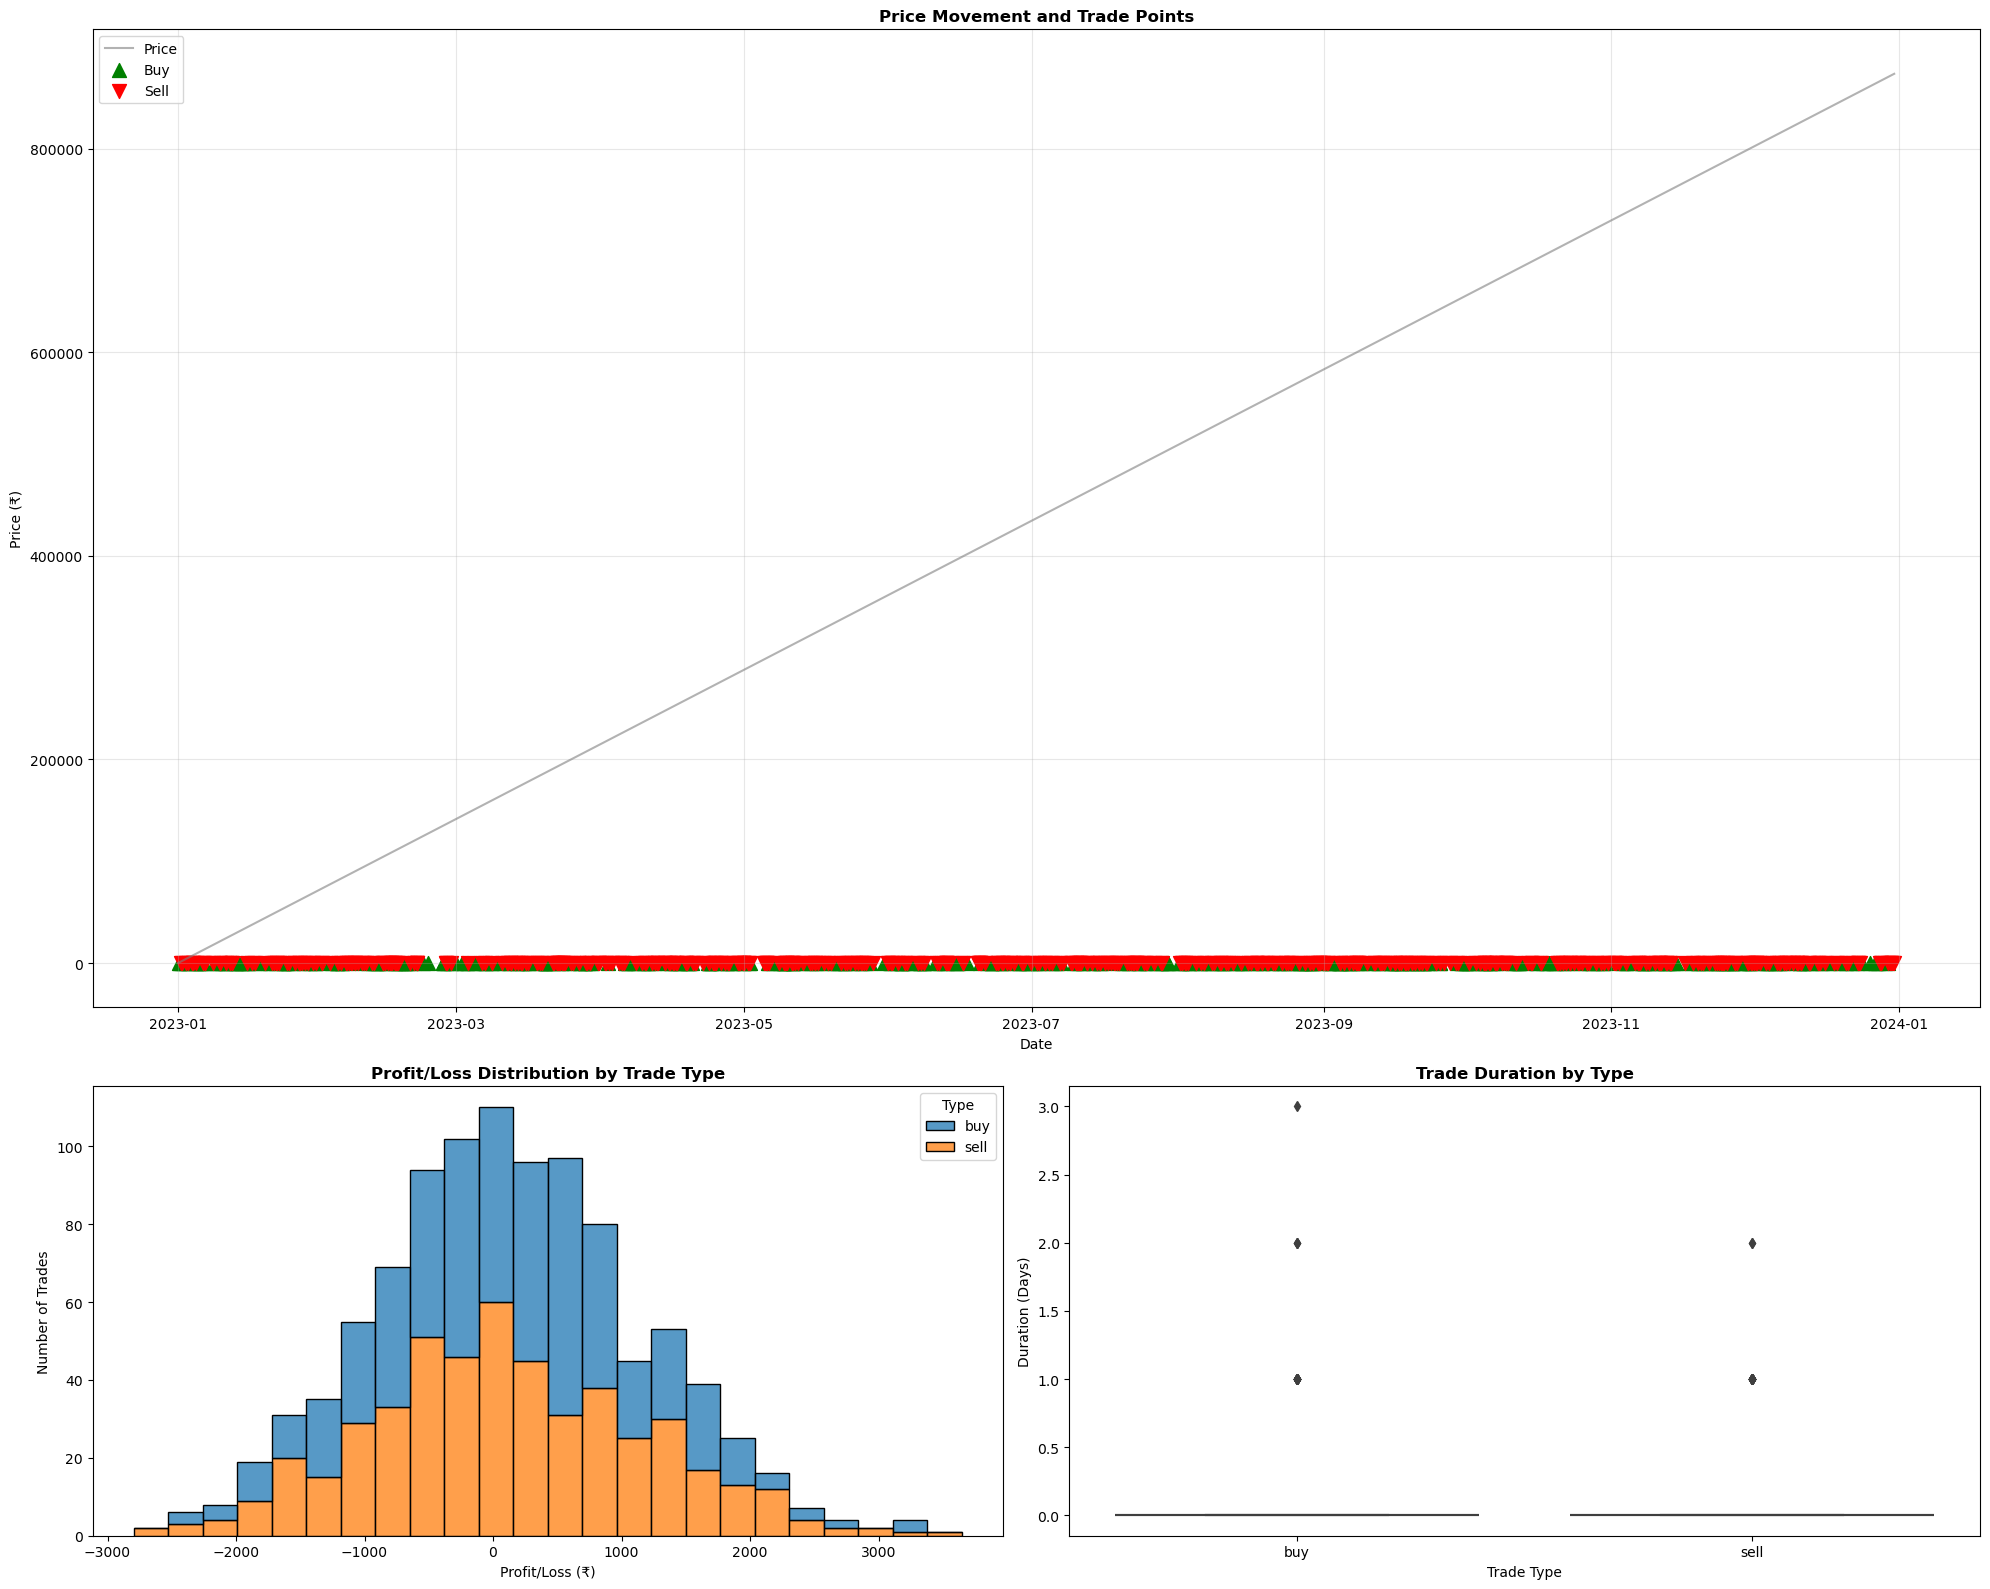

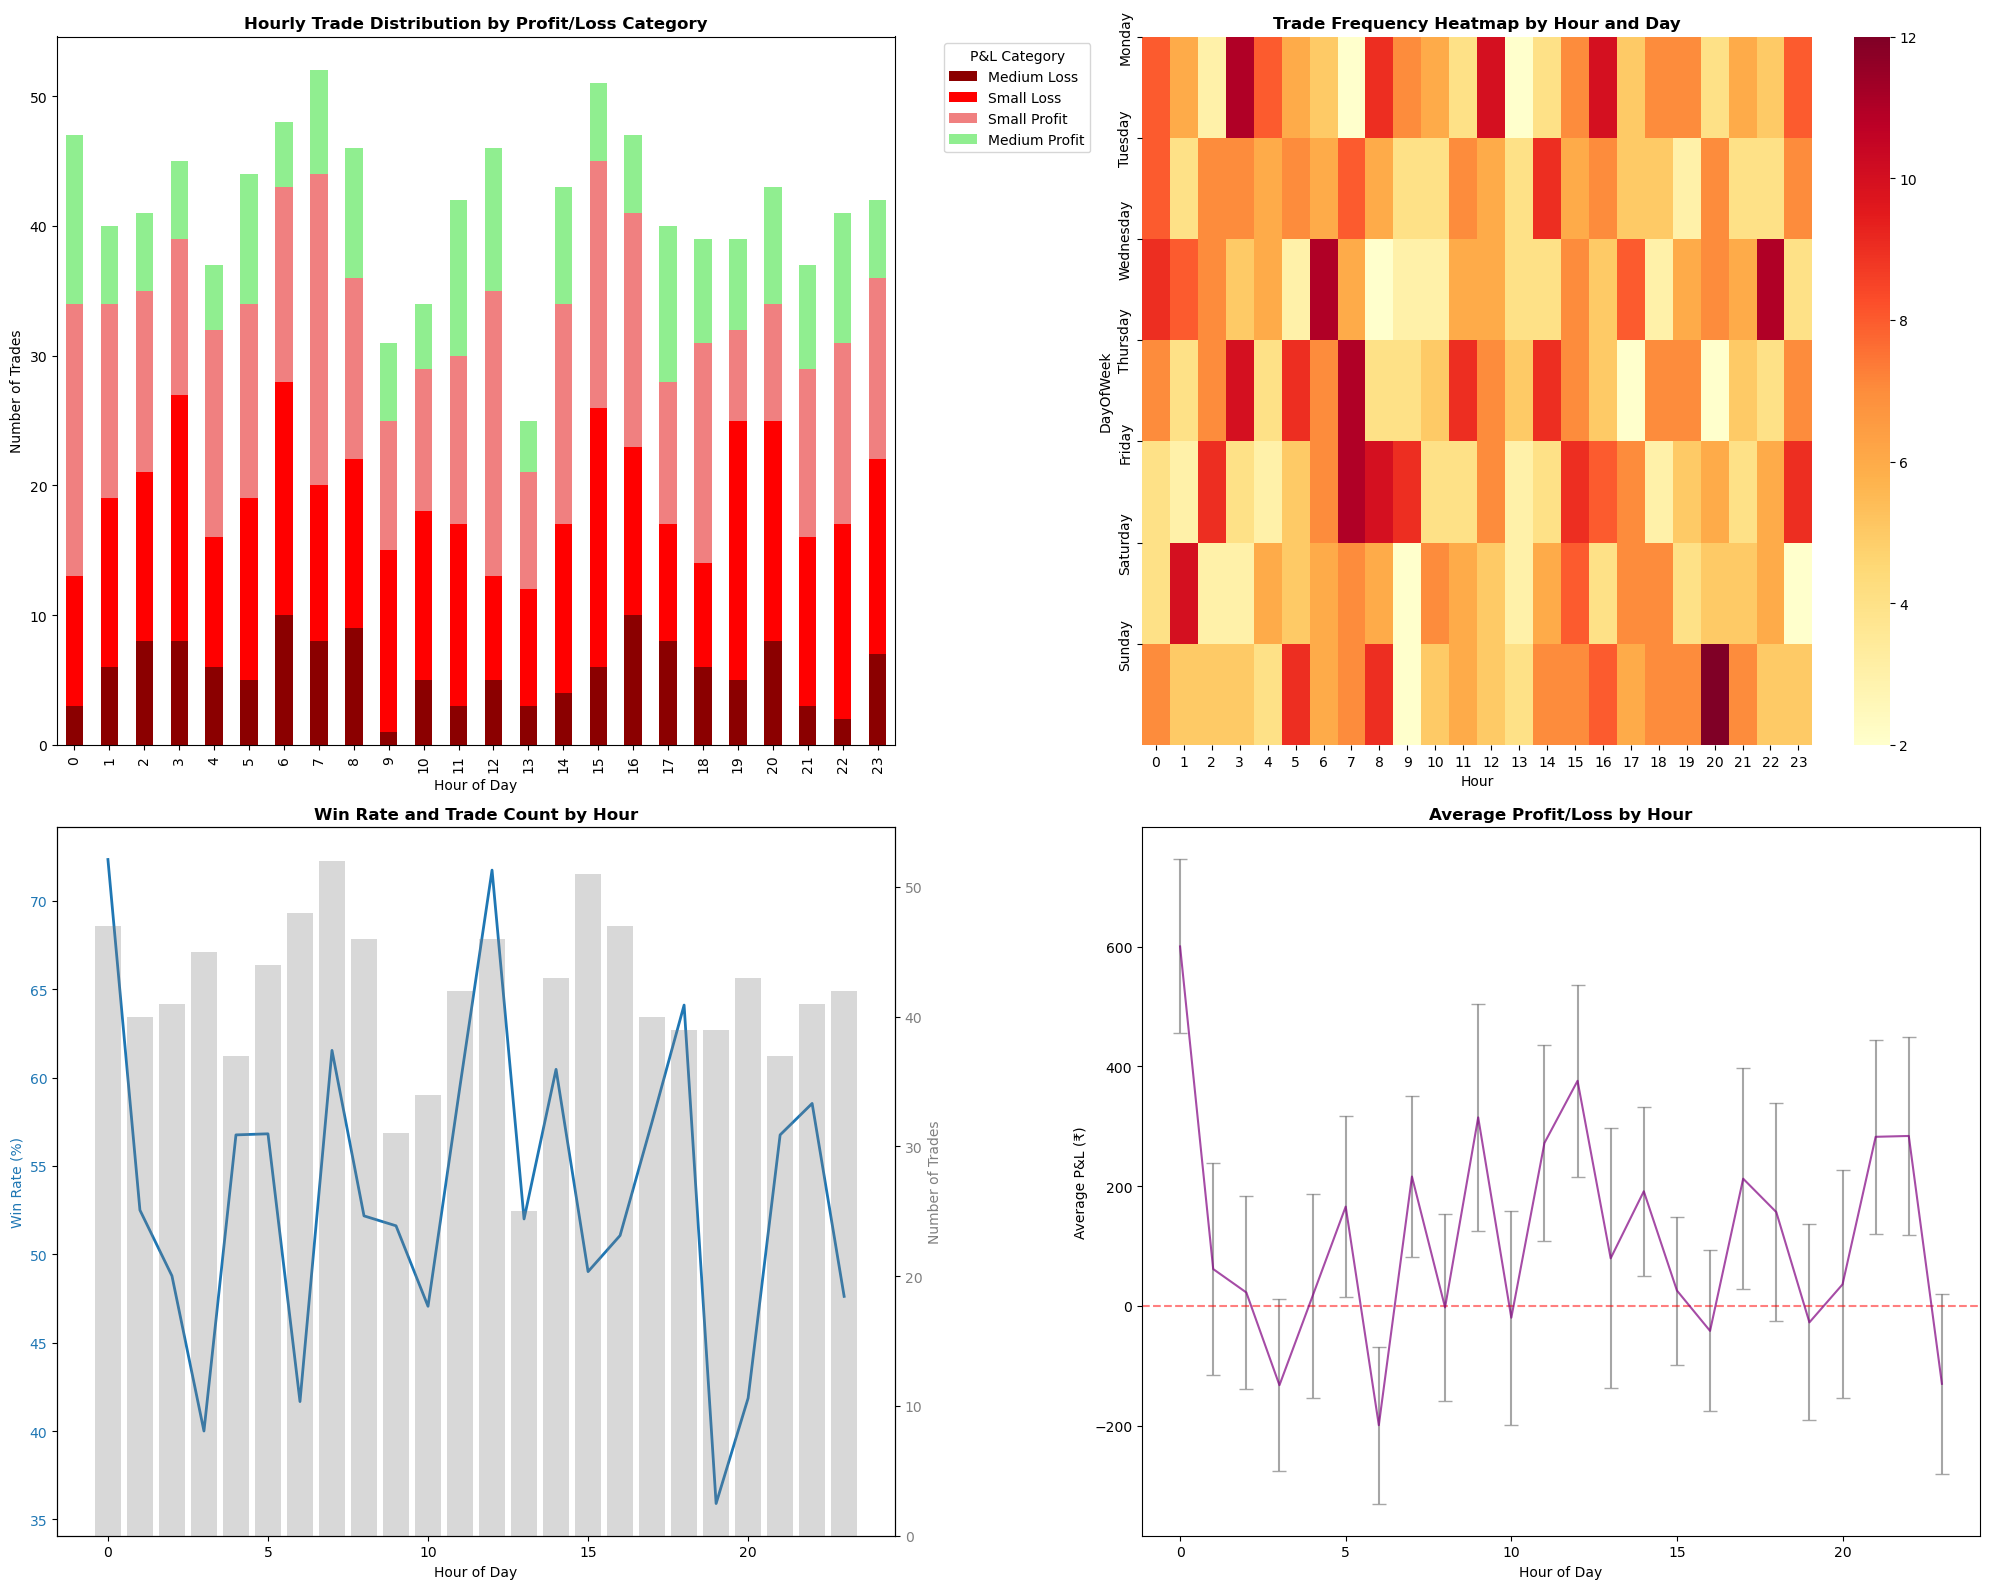

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

class EnhancedTradeAnalyzer:
    def __init__(self, trade_data, price_data):
        self.trade_data = trade_data
        self.price_data = price_data
        self._preprocess_data()

    def _preprocess_data(self):
        self.trade_data['Hour'] = self.trade_data.index.hour
        self.trade_data['DayOfWeek'] = self.trade_data.index.dayofweek
        self.trade_data['Duration'] = (self.trade_data.index - self.trade_data.index.to_series().shift(1)).dt.days
        self.trade_data['Duration'] = self.trade_data['Duration'].fillna(0)

    def plot_enhanced_trade_analysis(self):
        fig = plt.figure(figsize=(20, 16))
        gs = GridSpec(3, 2, figure=fig)

        self._plot_price_and_trades(fig.add_subplot(gs[0:2, :]))
        self._plot_pnl_distribution(fig.add_subplot(gs[2, 0]))
        self._plot_trade_duration_analysis(fig.add_subplot(gs[2, 1]))

        plt.tight_layout()
        return fig

    def _plot_price_and_trades(self, ax):
        ax.plot(self.price_data.index, self.price_data['Close'], color='gray', alpha=0.6, label='Price')

        for trade_type, color, marker in [('buy', 'green', '^'), ('sell', 'red', 'v')]:
            trades = self.trade_data[self.trade_data['Type'] == trade_type]
            ax.scatter(trades.index, trades['Price'], color=color, marker=marker, s=100, label=trade_type.capitalize())

        ax.set_title('Price Movement and Trade Points', fontsize=12, fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price (₹)')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_pnl_distribution(self, ax):
        sns.histplot(data=self.trade_data, x='PnL', hue='Type', multiple="stack", ax=ax)
        ax.set_title('Profit/Loss Distribution by Trade Type', fontsize=12, fontweight='bold')
        ax.set_xlabel('Profit/Loss (₹)')
        ax.set_ylabel('Number of Trades')

    def _plot_trade_duration_analysis(self, ax):
        sns.boxplot(data=self.trade_data, x='Type', y='Duration', ax=ax)
        ax.set_title('Trade Duration by Type', fontsize=12, fontweight='bold')
        ax.set_xlabel('Trade Type')
        ax.set_ylabel('Duration (Days)')

    def plot_enhanced_time_analysis(self):
        fig = plt.figure(figsize=(20, 16))
        gs = GridSpec(2, 2, figure=fig)

        self._plot_hourly_pnl_distribution(fig.add_subplot(gs[0, 0]))
        self._plot_hour_day_heatmap(fig.add_subplot(gs[0, 1]))
        self._plot_win_rate_by_hour(fig.add_subplot(gs[1, 0]))
        self._plot_avg_pnl_by_hour(fig.add_subplot(gs[1, 1]))

        plt.tight_layout()
        return fig

    def _plot_hourly_pnl_distribution(self, ax):
        self.trade_data['PnL_Category'] = pd.cut(self.trade_data['PnL'],
                                                bins=[-np.inf, -5000, -1000, 0, 1000, 5000, np.inf],
                                                labels=['Large Loss', 'Medium Loss', 'Small Loss',
                                                        'Small Profit', 'Medium Profit', 'Large Profit'])

        pivot_data = pd.crosstab(self.trade_data['Hour'], self.trade_data['PnL_Category'])
        pivot_data.plot(kind='bar', stacked=True, ax=ax,
                        color=['darkred', 'red', 'lightcoral', 'lightgreen', 'green', 'darkgreen'])

        ax.set_title('Hourly Trade Distribution by Profit/Loss Category', fontsize=12, fontweight='bold')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Number of Trades')
        ax.legend(title='P&L Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    def _plot_hour_day_heatmap(self, ax):
        day_hour_counts = pd.crosstab(self.trade_data['DayOfWeek'], self.trade_data['Hour'])
        sns.heatmap(day_hour_counts, cmap='YlOrRd', ax=ax)
        ax.set_yticks(range(7))
        ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        ax.set_title('Trade Frequency Heatmap by Hour and Day', fontsize=12, fontweight='bold')

    def _plot_win_rate_by_hour(self, ax):
        hourly_stats = self.trade_data.groupby('Hour').apply(
            lambda x: pd.Series({
                'Win_Rate': (x['PnL'] > 0).mean() * 100,
                'Trade_Count': len(x)
            })
        ).reset_index()

        color = 'tab:blue'
        ax2 = ax.twinx()

        ax.plot(hourly_stats['Hour'], hourly_stats['Win_Rate'], color=color, linewidth=2)
        ax.set_ylabel('Win Rate (%)', color=color)
        ax.tick_params(axis='y', labelcolor=color)

        ax2.bar(hourly_stats['Hour'], hourly_stats['Trade_Count'], alpha=0.3, color='gray')
        ax2.set_ylabel('Number of Trades', color='gray')
        ax2.tick_params(axis='y', labelcolor='gray')

        ax.set_title('Win Rate and Trade Count by Hour', fontsize=12, fontweight='bold')
        ax.set_xlabel('Hour of Day')

    def _plot_avg_pnl_by_hour(self, ax):
        hourly_pnl = self.trade_data.groupby('Hour')['PnL'].agg(['mean', 'std', 'count']).reset_index()
        hourly_pnl['sem'] = hourly_pnl['std'] / np.sqrt(hourly_pnl['count'])

        ax.errorbar(hourly_pnl['Hour'], hourly_pnl['mean'], yerr=hourly_pnl['sem'],
                    color='purple', capsize=5, capthick=1, ecolor='gray', alpha=0.7)
        ax.axhline(y=0, color='r', linestyle='--', alpha=0.5)

        ax.set_title('Average Profit/Loss by Hour', fontsize=12, fontweight='bold')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Average P&L (₹)')

    def generate_trade_metrics(self):
        metrics = {
            'Total Trades': len(self.trade_data),
            'Winning Trades': len(self.trade_data[self.trade_data['PnL'] > 0]),
            'Losing Trades': len(self.trade_data[self.trade_data['PnL'] < 0]),
            'Total Profit': self.trade_data[self.trade_data['PnL'] > 0]['PnL'].sum(),
            'Total Loss': self.trade_data[self.trade_data['PnL'] < 0]['PnL'].sum(),
            'Largest Win': self.trade_data['PnL'].max(),
            'Largest Loss': self.trade_data['PnL'].min(),
            'Average Trade Duration': self.trade_data['Duration'].mean(),
            'Win Rate': len(self.trade_data[self.trade_data['PnL'] > 0]) / len(self.trade_data) * 100
        }

        type_metrics = {}
        for trade_type in self.trade_data['Type'].unique():
            type_data = self.trade_data[self.trade_data['Type'] == trade_type]
            type_metrics[trade_type] = {
                'Count': len(type_data),
                'Avg PnL': type_data['PnL'].mean(),
                'Avg Duration': type_data['Duration'].mean()
            }

        return metrics, type_metrics

def demonstrate_enhanced_analysis():
    # Generate sample data
    np.random.seed(42)
    dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='H')

    price_data = pd.DataFrame({
        'Close': 100 * (1 + np.random.normal(0, 0.001, len(dates))).cumsum(),
        'Open': 100 * (1 + np.random.normal(0, 0.001, len(dates))).cumsum(),
        'High': 100 * (1 + np.random.normal(0, 0.001, len(dates))).cumsum() + 0.5,
        'Low': 100 * (1 + np.random.normal(0, 0.001, len(dates))).cumsum() - 0.5
    }, index=dates)

    n_trades = 1000
    trade_dates = np.random.choice(dates, n_trades, replace=False)
    trade_data = pd.DataFrame({
        'Type': np.random.choice(['buy', 'sell'], n_trades),
        'Price': np.random.uniform(90, 110, n_trades),
        'Shares': np.random.randint(100, 1000, n_trades),
        'PnL': np.random.normal(100, 1000, n_trades)
    }, index=sorted(trade_dates))

    analyzer = EnhancedTradeAnalyzer(trade_data, price_data)

    main_plot = analyzer.plot_enhanced_trade_analysis()
    main_plot.savefig('enhanced_trade_analysis.png')

    time_analysis_plot = analyzer.plot_enhanced_time_analysis()
    time_analysis_plot.savefig('enhanced_time_analysis.png')

    metrics, type_metrics = analyzer.generate_trade_metrics()

    print("Overall Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.2f}")

    print("\nMetrics by Trade Type:")
    for t, m in type_metrics.items():
        print(f"{t}:")
        for mk, mv in m.items():
            print(f"  {mk}: {mv:.2f}")

if __name__ == "__main__":
    demonstrate_enhanced_analysis()

<h2>ROI Calculation</h2>

ROI for NIFTY 50 stocks:
RELIANCE.NS: 21.07%
TCS.NS: 18.57%
HDFCBANK.NS: 10.82%
ICICIBANK.NS: 33.22%
INFY.NS: 33.56%
HINDUNILVR.NS: 15.38%
ITC.NS: 18.06%
SBIN.NS: 38.44%
BHARTIARTL.NS: 78.47%
KOTAKBANK.NS: 5.33%
LT.NS: 14.53%
AXISBANK.NS: 18.37%
ASIANPAINT.NS: -1.43%
MARUTI.NS: 24.21%
TITAN.NS: 12.69%
BAJFINANCE.NS: -9.72%
ULTRACEMCO.NS: 42.02%
SUNPHARMA.NS: 71.59%
TATAMOTORS.NS: 51.23%
WIPRO.NS: 31.83%
HCLTECH.NS: 47.71%
NTPC.NS: 88.46%
POWERGRID.NS: 80.44%
M&M.NS: 100.60%
BAJAJFINSV.NS: 16.29%
TECHM.NS: 37.23%
ADANIENT.NS: 27.40%
JSWSTEEL.NS: 37.53%
HINDALCO.NS: 60.11%
GRASIM.NS: 46.46%
ADANIPORTS.NS: 79.71%
DRREDDY.NS: 21.43%
COALINDIA.NS: 84.59%
TATASTEEL.NS: 37.35%
ONGC.NS: 71.13%
INDUSINDBK.NS: -2.12%
BRITANNIA.NS: 39.01%
NESTLEIND.NS: 15.03%
BAJAJ-AUTO.NS: 137.06%
APOLLOHOSP.NS: 34.53%
CIPLA.NS: 41.19%
DIVISLAB.NS: 47.33%
UPL.NS: -1.57%
EICHERMOT.NS: 38.12%
TATACONSUM.NS: 29.24%
SBILIFE.NS: 41.03%
HEROMOTOCO.NS: 89.21%
BPCL.NS: 116.32%


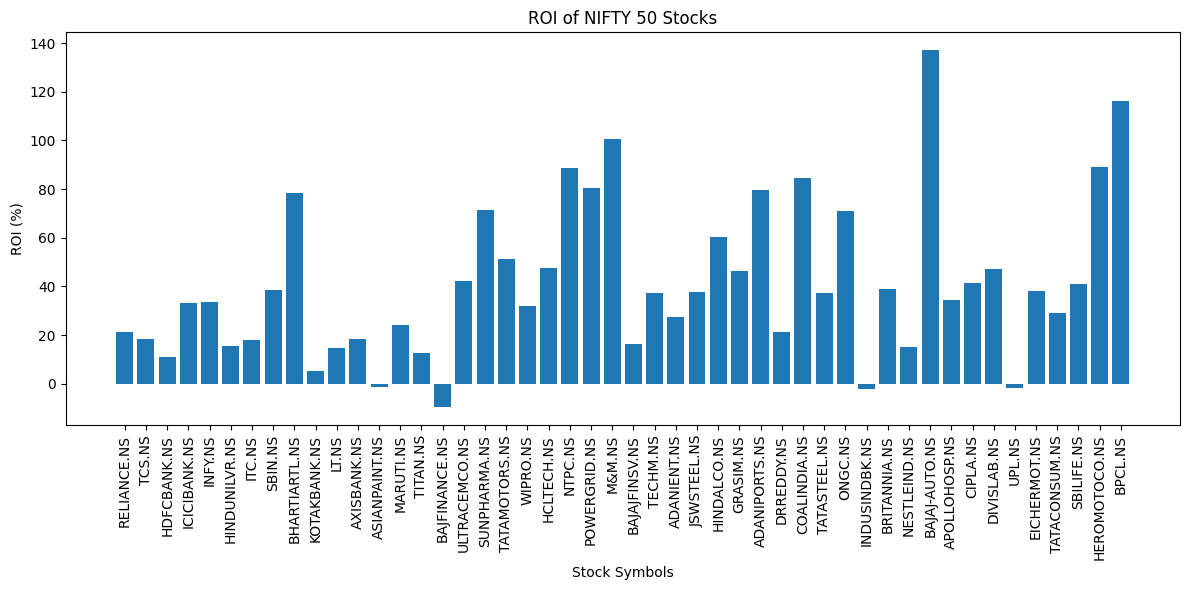

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_nifty50_symbols():
    # This function should return a list of NIFTY 50 stock symbols
    # For demonstration, I'll use a subset of symbols. In practice, you'd want to use all 50.
    return [
        'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',
            'INFY.NS', 'HINDUNILVR.NS', 'ITC.NS', 'SBIN.NS', 'BHARTIARTL.NS',
            'KOTAKBANK.NS', 'LT.NS', 'AXISBANK.NS', 'ASIANPAINT.NS', 'MARUTI.NS',
            'TITAN.NS', 'BAJFINANCE.NS', 'ULTRACEMCO.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS',
            'WIPRO.NS', 'HCLTECH.NS', 'NTPC.NS', 'POWERGRID.NS', 'M&M.NS',
            'BAJAJFINSV.NS', 'TECHM.NS', 'ADANIENT.NS', 'JSWSTEEL.NS', 'HINDALCO.NS',
            'GRASIM.NS', 'ADANIPORTS.NS', 'DRREDDY.NS', 'COALINDIA.NS', 'TATASTEEL.NS',
            'ONGC.NS', 'INDUSINDBK.NS', 'BRITANNIA.NS', 'NESTLEIND.NS', 'BAJAJ-AUTO.NS',
            'APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS', 'UPL.NS', 'EICHERMOT.NS',
            'TATACONSUM.NS', 'SBILIFE.NS', 'HEROMOTOCO.NS', 'BPCL.NS', 'HINDUNILVR.NS'
    ]

def calculate_roi(start_price, end_price):
    return ((end_price - start_price) / start_price) * 100

def fetch_and_calculate_roi(symbols, start_date, end_date):
    roi_data = {}
    for symbol in symbols:
        stock = yf.Ticker(symbol)
        history = stock.history(start=start_date, end=end_date)
        if not history.empty:
            start_price = history['Close'].iloc[0]
            end_price = history['Close'].iloc[-1]
            roi = calculate_roi(start_price, end_price)
            roi_data[symbol] = roi
    return roi_data

def visualize_roi(roi_data):
    plt.figure(figsize=(12, 6))
    plt.bar(roi_data.keys(), roi_data.values())
    plt.title('ROI of NIFTY 50 Stocks')
    plt.xlabel('Stock Symbols')
    plt.ylabel('ROI (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def main():
    symbols = get_nifty50_symbols()
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)  # 1 year of data

    roi_data = fetch_and_calculate_roi(symbols, start_date, end_date)

    print("ROI for NIFTY 50 stocks:")
    for symbol, roi in roi_data.items():
        print(f"{symbol}: {roi:.2f}%")

    visualize_roi(roi_data)

if __name__ == "__main__":
    main()

<h2>Trading Signals (Entry/Exit Points) & Frequency of Trades</h2>

Processing RELIANCE.NS...


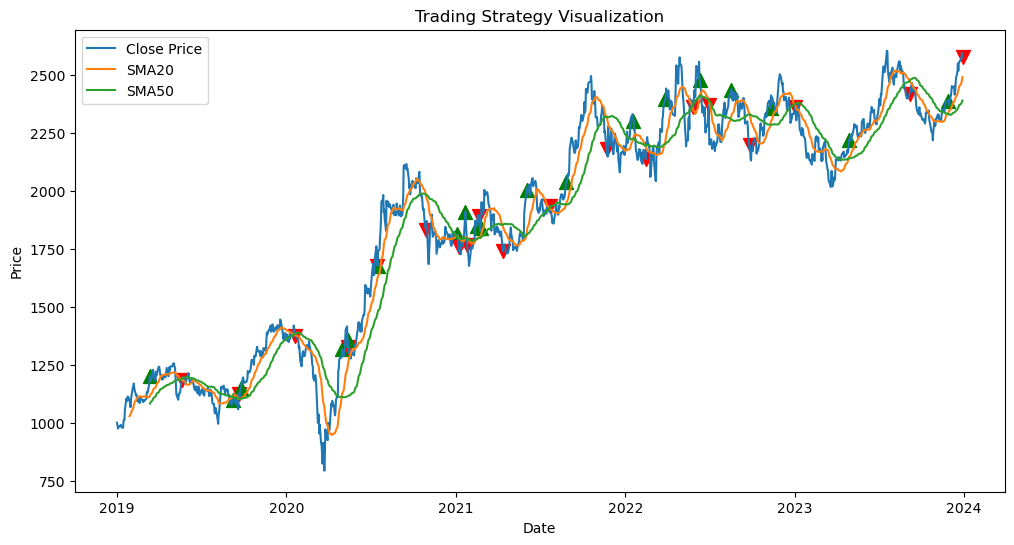

Processing TCS.NS...


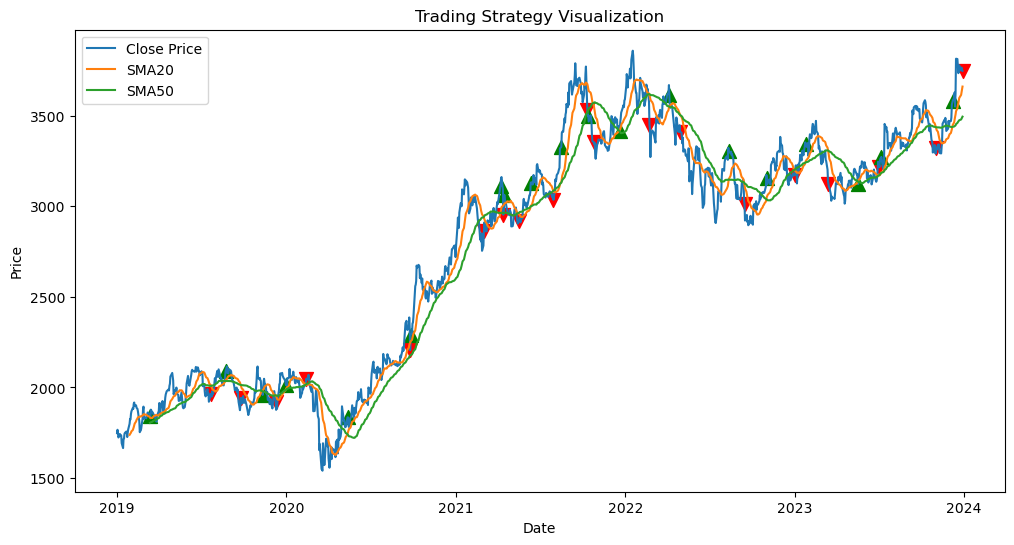

Processing ICICIBANK.NS...


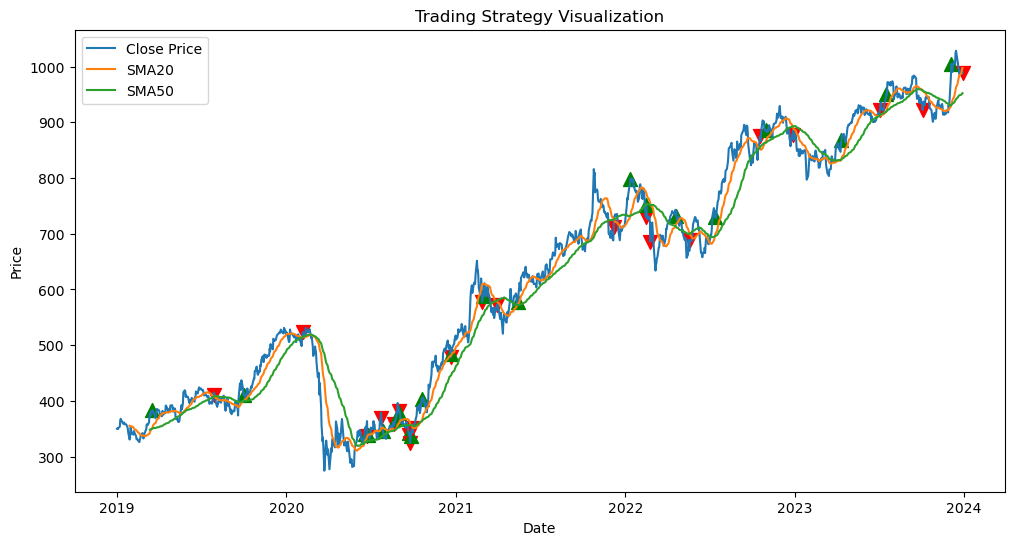

Processing HDFCBANK.NSINFY.NS...


$HDFCBANK.NSINFY.NS: possibly delisted; no timezone found


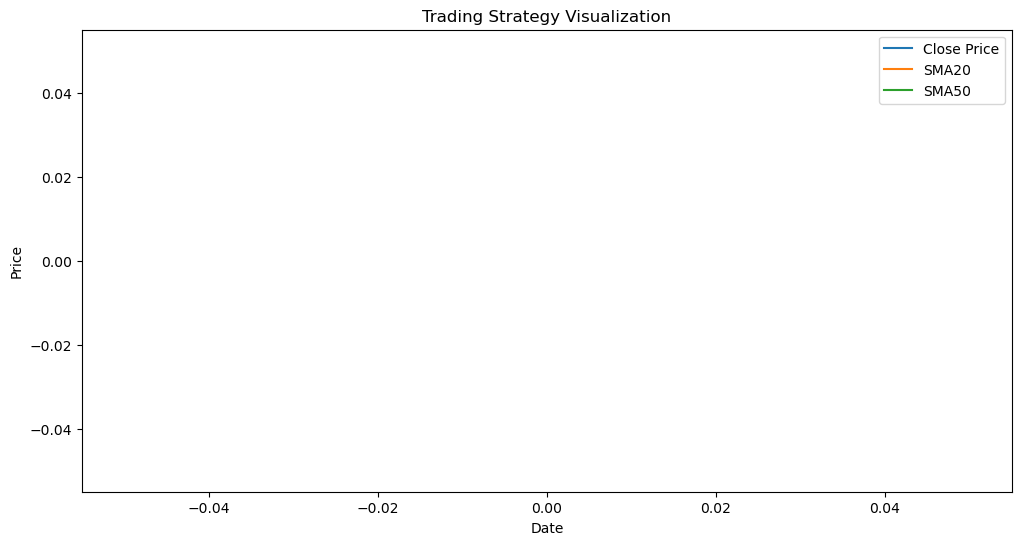

Processing HINDUNILVR.NS...


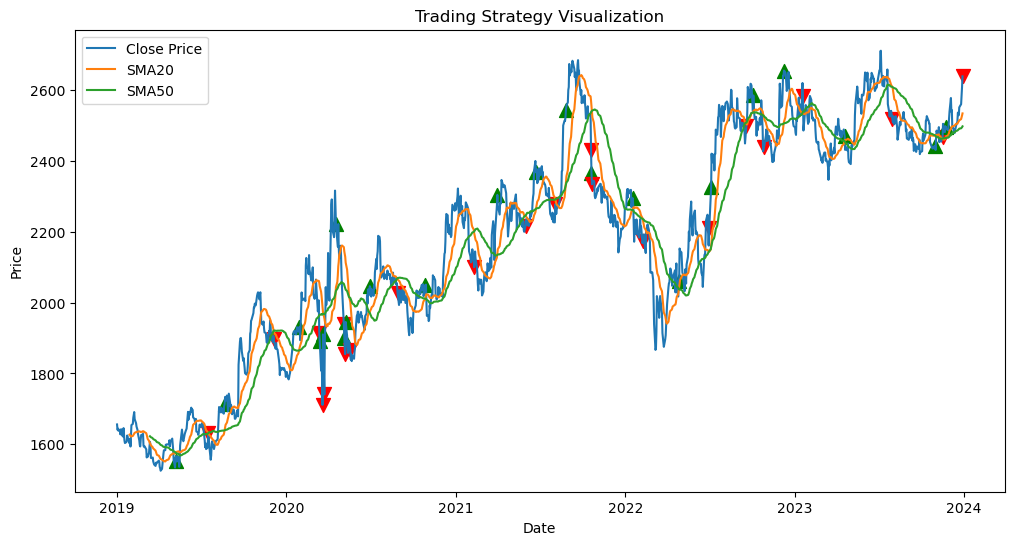

Processing ITC.NS...


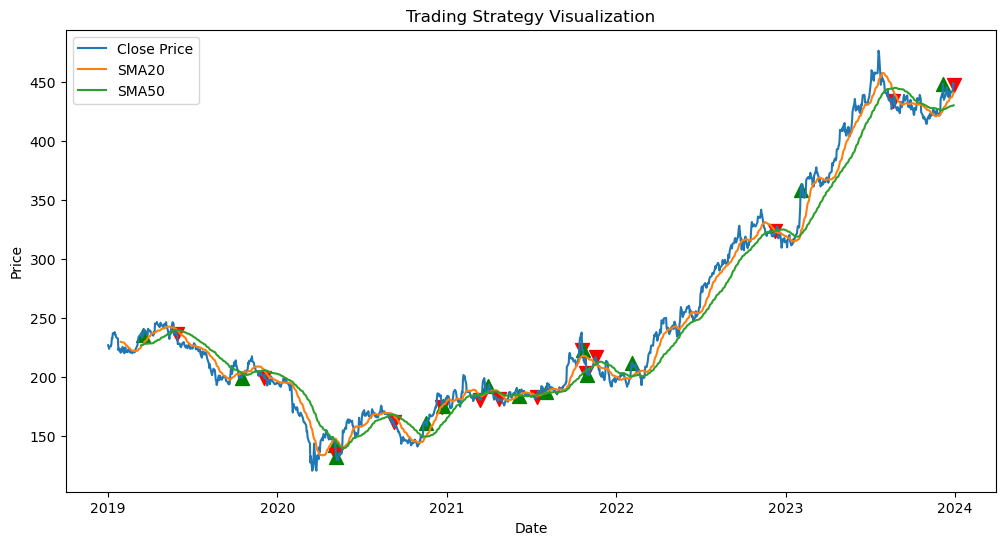

Processing SBIN.NS...


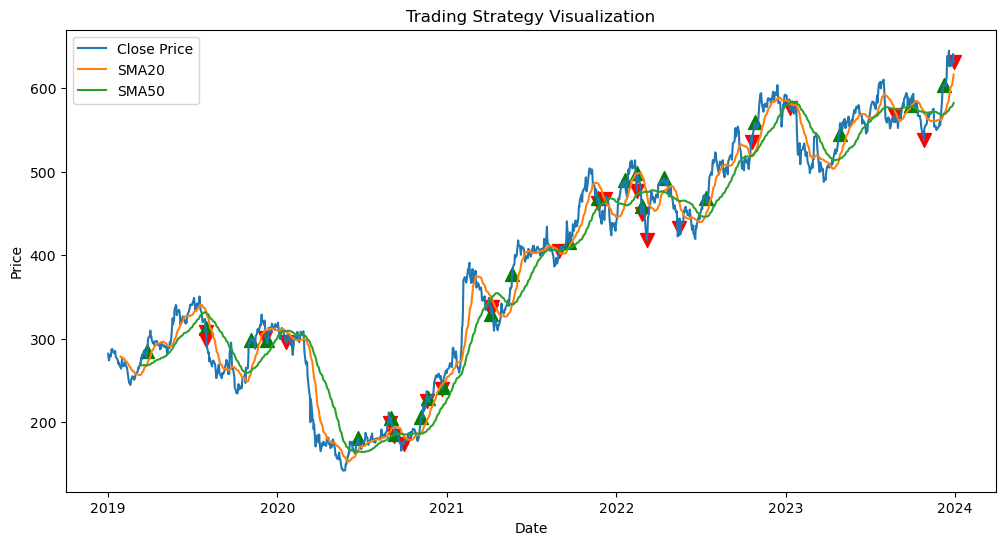

Processing BHARTIARTL.NS...


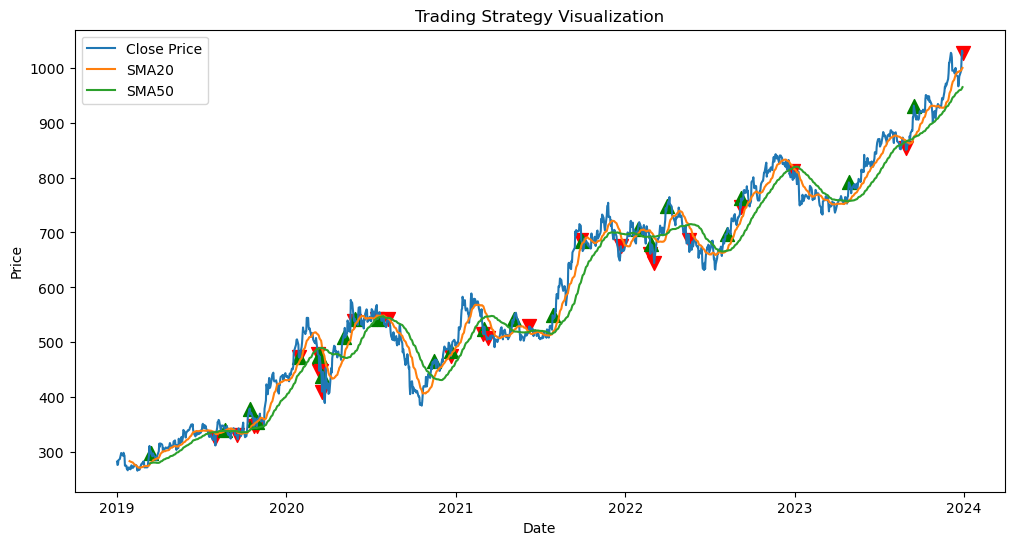

Processing KOTAKBANK.NS...


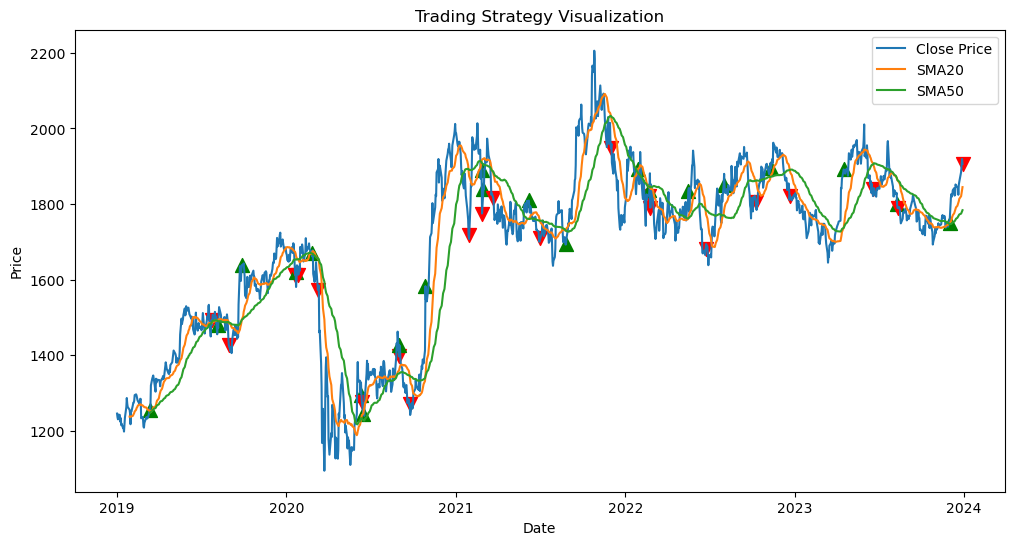

Processing LT.NS...


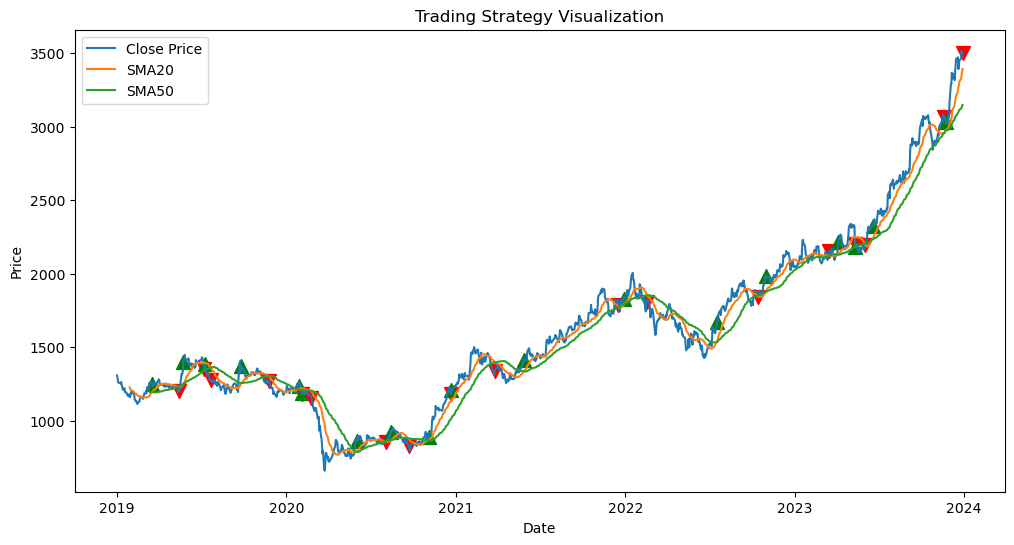

Processing AXISBANK.NS...


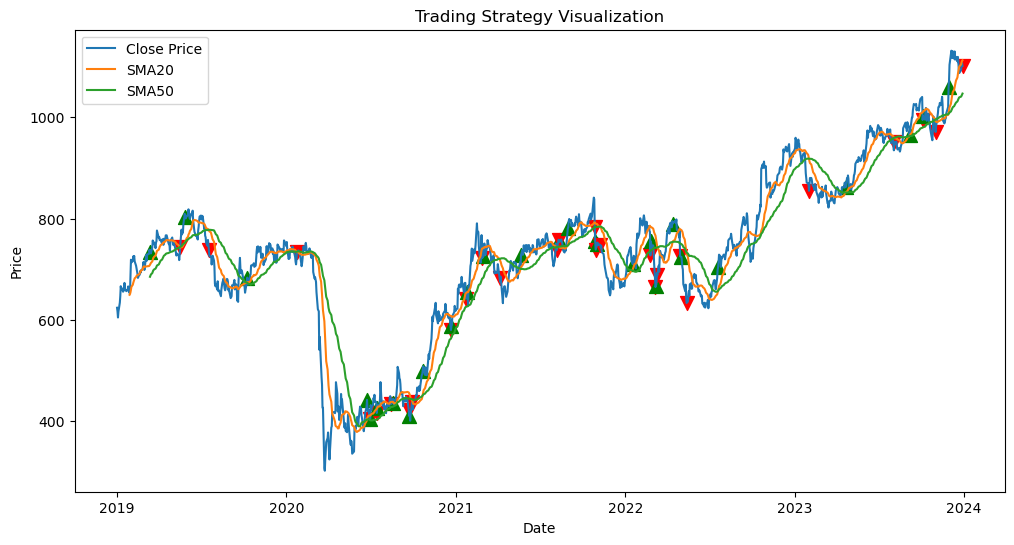

Processing ASIANPAINT.NS...


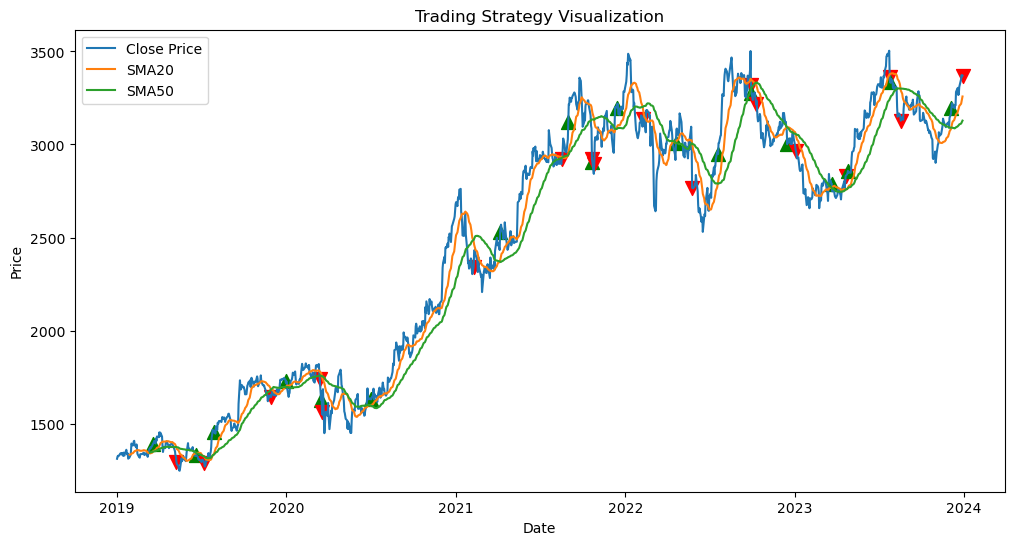

Processing MARUTI.NS...


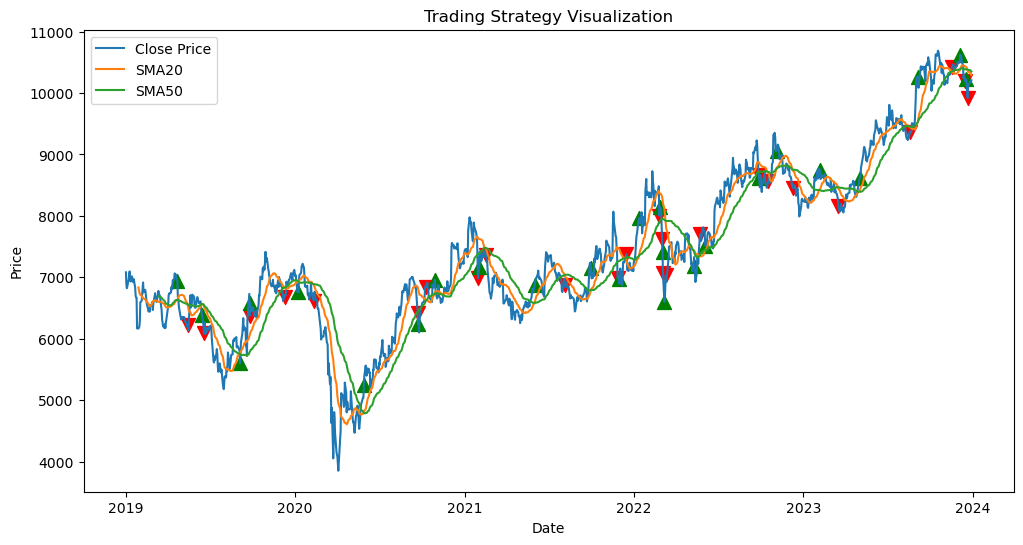

Processing TITAN.NS...


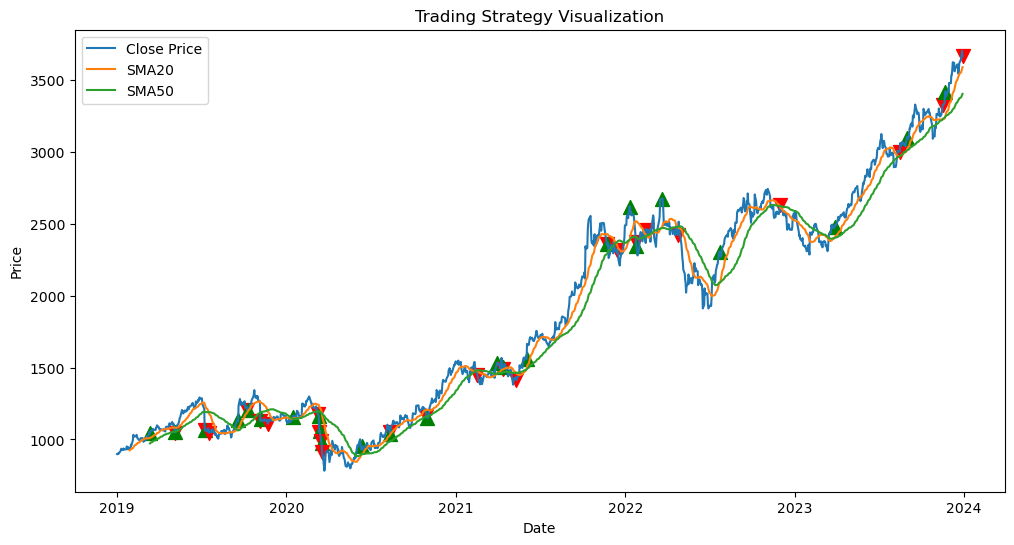

Processing BAJFINANCE.NS...


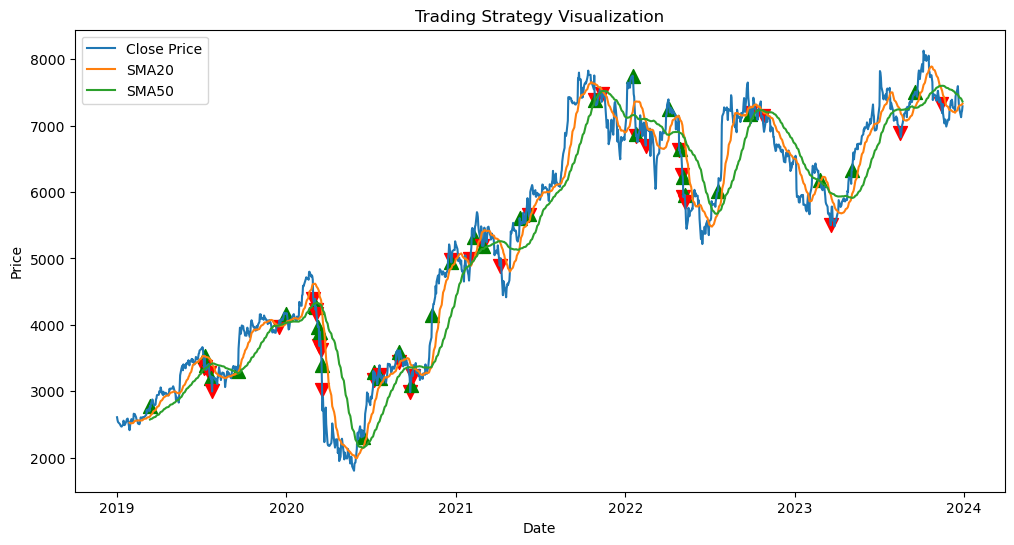

Processing ULTRACEMCO.NS...


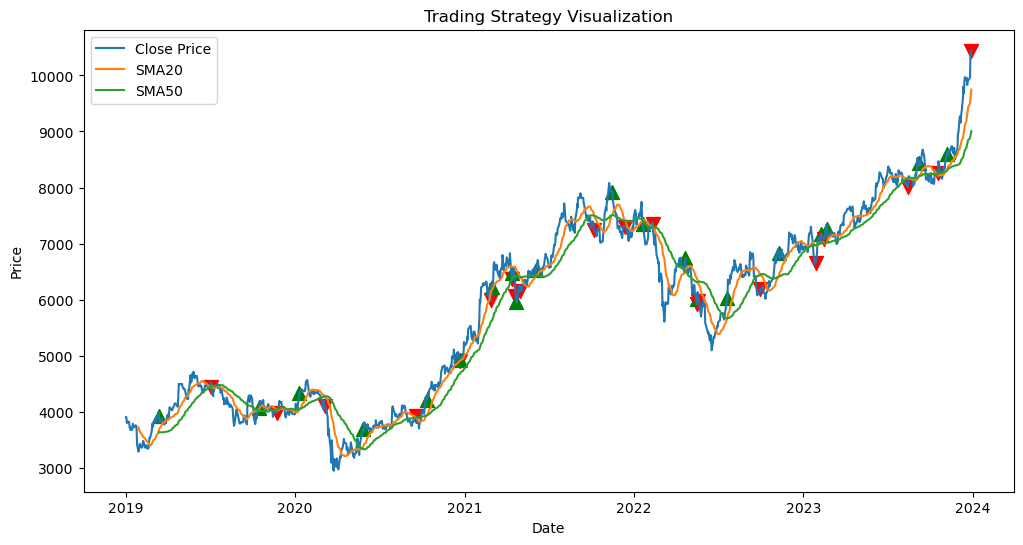

Processing SUNPHARMA.NS...


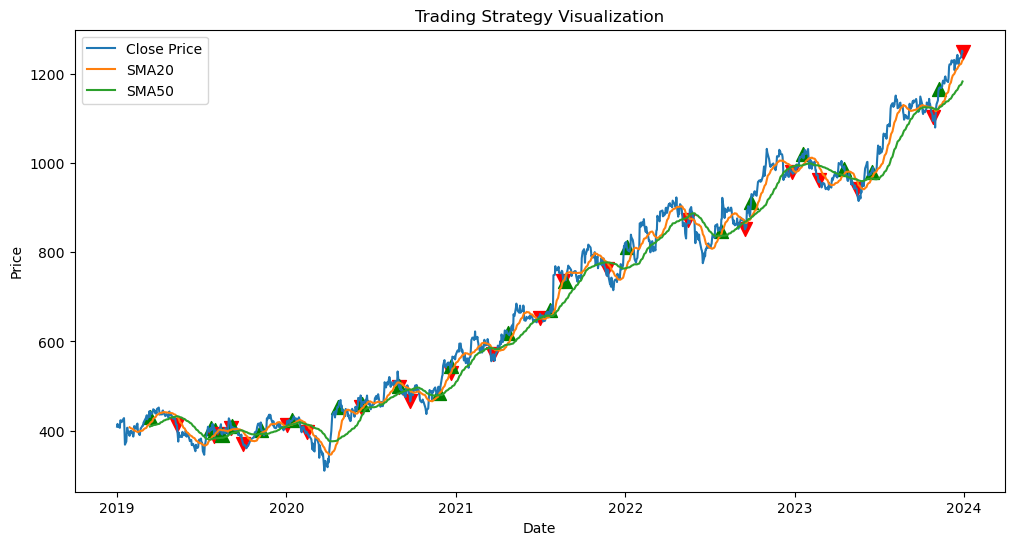

Processing TATAMOTORS.NS...


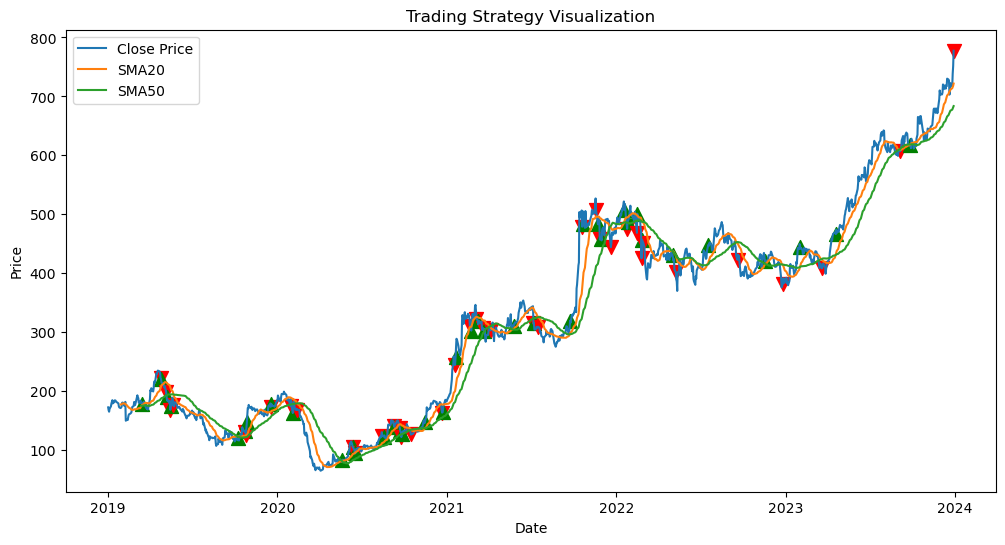

Processing WIPRO.NS...


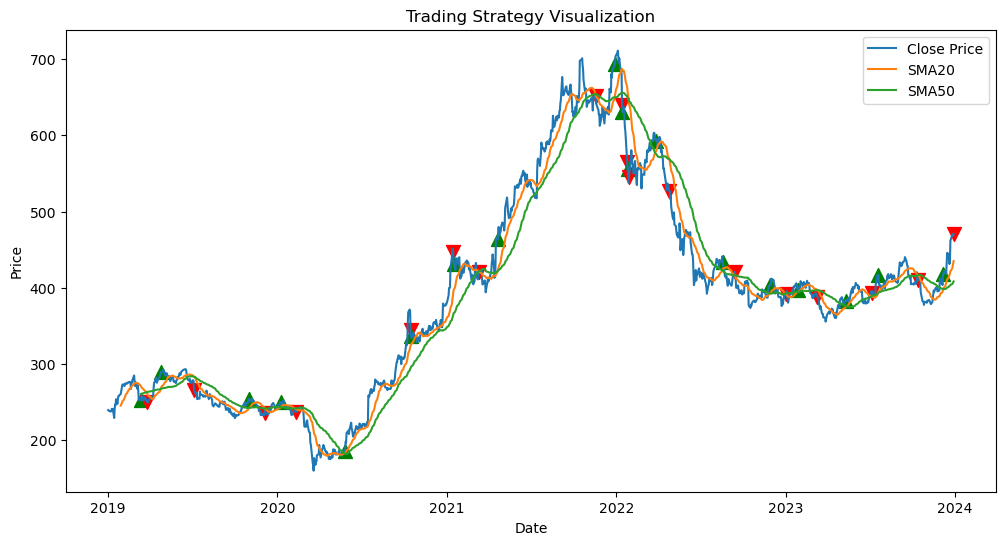

Processing HCLTECH.NS...


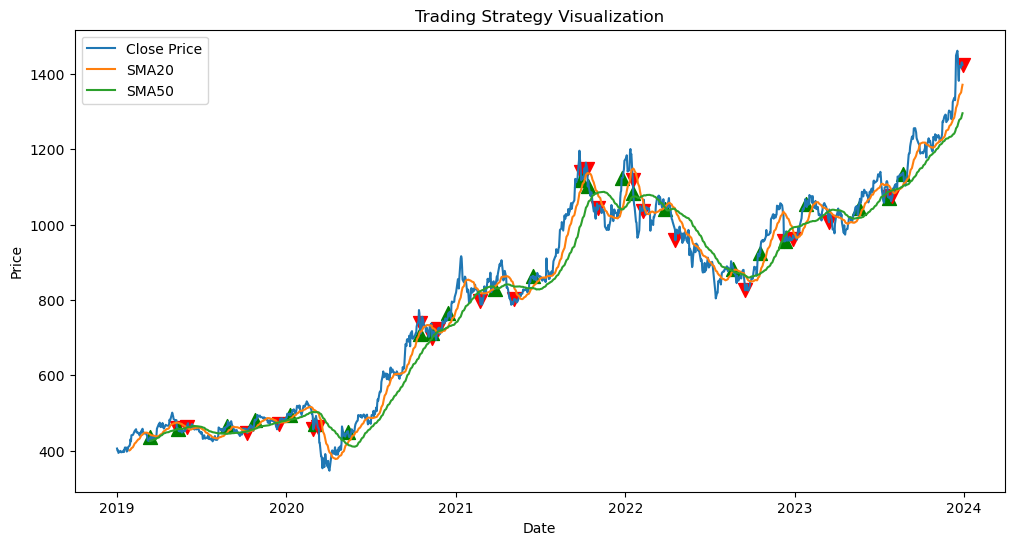

Processing NTPC.NS...


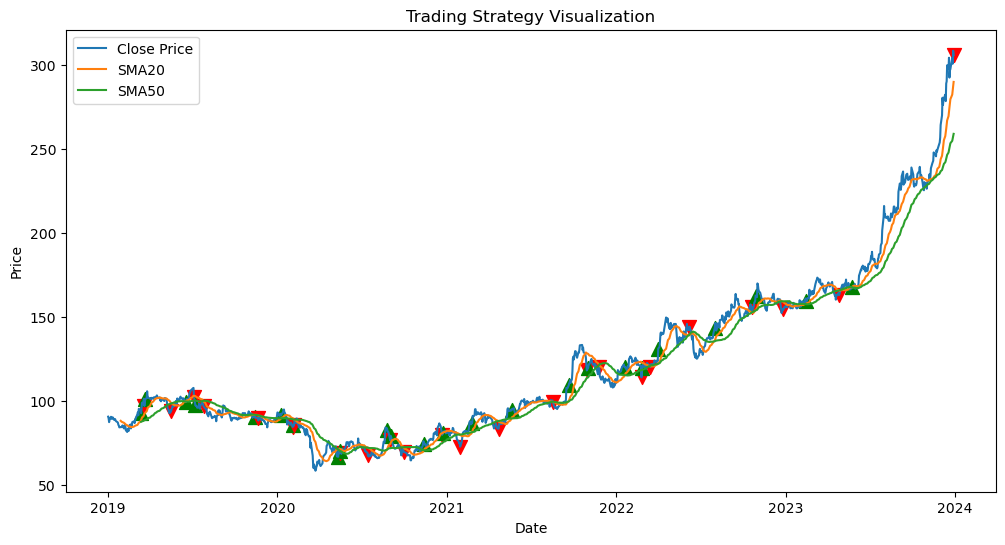

Processing POWERGRID.NS...


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def get_nifty50_symbols():
    # In a real-world scenario, you'd want to fetch all 50 symbols
    # For demonstration, we'll use a subset
    return [
        'RELIANCE.NS', 'TCS.NS', 'ICICIBANK.NS', 'HDFCBANK.NS'
            'INFY.NS', 'HINDUNILVR.NS', 'ITC.NS', 'SBIN.NS', 'BHARTIARTL.NS',
            'KOTAKBANK.NS', 'LT.NS', 'AXISBANK.NS', 'ASIANPAINT.NS', 'MARUTI.NS',
            'TITAN.NS', 'BAJFINANCE.NS', 'ULTRACEMCO.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS',
            'WIPRO.NS', 'HCLTECH.NS', 'NTPC.NS', 'POWERGRID.NS', 'M&M.NS',
            'BAJAJFINSV.NS', 'TECHM.NS', 'ADANIENT.NS', 'JSWSTEEL.NS', 'HINDALCO.NS',
            'GRASIM.NS', 'ADANIPORTS.NS', 'DRREDDY.NS', 'COALINDIA.NS', 'TATASTEEL.NS',
            'ONGC.NS', 'INDUSINDBK.NS', 'BRITANNIA.NS', 'NESTLEIND.NS', 'BAJAJ-AUTO.NS',
            'APOLLOHOSP.NS', 'CIPLA.NS', 'DIVISLAB.NS', 'UPL.NS', 'EICHERMOT.NS',
            'TATACONSUM.NS', 'SBILIFE.NS', 'HEROMOTOCO.NS', 'BPCL.NS', 'HINDUNILVR.NS'
    ]

def fetch_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    df = stock.history(start=start_date, end=end_date)
    return df

def generate_signals(df):
    # Simple moving average crossover strategy
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['SMA50'] = df['Close'].rolling(window=50).mean()

    df['Signal'] = 0
    df.loc[df['SMA20'] > df['SMA50'], 'Signal'] = 1
    df.loc[df['SMA20'] < df['SMA50'], 'Signal'] = -1

    return df

def implement_stop_loss(df, stop_loss_pct):
    df['Stop_Loss'] = df['Close'] * (1 - stop_loss_pct)
    df['Exit_Signal'] = 0

    for i in range(1, len(df)):
        if df['Signal'].iloc[i-1] == 1 and df['Low'].iloc[i] <= df['Stop_Loss'].iloc[i-1]:
            df.loc[df.index[i], 'Exit_Signal'] = 1

    return df

def backtest_strategy(df, initial_capital):
    position = 0
    balance = initial_capital
    shares = 0
    entry_price = 0
    trades = []

    for i in range(1, len(df)):
        if df['Signal'].iloc[i] == 1 and position == 0:
            # Buy signal
            shares = balance // df['Close'].iloc[i]
            cost = shares * df['Close'].iloc[i]
            balance -= cost
            position = 1
            entry_price = df['Close'].iloc[i]
            trades.append((df.index[i], entry_price, 'Buy'))

        elif (df['Signal'].iloc[i] == -1 or df['Exit_Signal'].iloc[i] == 1) and position == 1:
            # Sell signal or stop loss triggered
            balance += shares * df['Close'].iloc[i]
            shares = 0
            position = 0
            trades.append((df.index[i], df['Close'].iloc[i], 'Sell'))

    # Close any open position at the end
    if position == 1:
        balance += shares * df['Close'].iloc[-1]
        trades.append((df.index[-1], df['Close'].iloc[-1], 'Sell'))

    return balance, trades

def visualize_strategy(df, trades):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['SMA20'], label='SMA20')
    plt.plot(df.index, df['SMA50'], label='SMA50')

    for trade in trades:
        if trade[2] == 'Buy':
            plt.scatter(trade[0], trade[1], color='g', marker='^', s=100)
        else:
            plt.scatter(trade[0], trade[1], color='r', marker='v', s=100)

    plt.title('Trading Strategy Visualization')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def main():
    start_date = "2019-01-01"
    end_date = "2023-12-31"
    initial_capital = 1000000  # 10,00,000 INR
    stop_loss_pct = 0.05  # 5% stop loss

    symbols = get_nifty50_symbols()
    results = {}

    for symbol in symbols:
        print(f"Processing {symbol}...")
        df = fetch_data(symbol, start_date, end_date)
        df = generate_signals(df)
        df = implement_stop_loss(df, stop_loss_pct)

        final_balance, trades = backtest_strategy(df, initial_capital)
        roi = (final_balance - initial_capital) / initial_capital * 100

        results[symbol] = {
            'ROI': roi,
            'Final Balance': final_balance,
            'Trades': len(trades)
        }

        visualize_strategy(df, trades)

    # Print results
    print("\nStrategy Results:")
    for symbol, result in results.items():
        print(f"{symbol}:")
        print(f"  ROI: {result['ROI']:.2f}%")
        print(f"  Final Balance: {result['Final Balance']:.2f} INR")
        print(f"  Number of Trades: {result['Trades']}")
        print()

if __name__ == "__main__":
    main()